In [375]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import statsmodels.api as sm


In [376]:
!gdown 1bVfjreE3C584wf15I1ifZ5lFQyZ2fbq6

Downloading...
From: https://drive.google.com/uc?id=1bVfjreE3C584wf15I1ifZ5lFQyZ2fbq6
To: /content/GuangzhouPM20100101_20151231.csv
100% 3.35M/3.35M [00:00<00:00, 182MB/s]


In [377]:
df = pd.read_csv("/content/GuangzhouPM20100101_20151231.csv")

In [378]:
df.head()

No  year  month  day  hour  season  PM_City Station  PM_5th Middle School  \
0   1  2010      1    1     0     4.0              NaN                   NaN   
1   2  2010      1    1     1     4.0              NaN                   NaN   
2   3  2010      1    1     2     4.0              NaN                   NaN   
3   4  2010      1    1     3     4.0              NaN                   NaN   
4   5  2010      1    1     4     4.0              NaN                   NaN   

   PM_US Post  DEWP  HUMI    PRES  TEMP cbwd  Iws  precipitation  Iprec  
0         NaN   9.4  76.0  1015.1  13.5   NW  0.8            0.0    0.0  
1         NaN  10.2  83.0  1015.2  13.0   cv  0.5            0.0    0.0  
2         NaN  10.4  87.0  1015.0  12.5   NW  0.6            0.3    0.3  
3         NaN  10.2  89.0  1014.9  12.0   NW  1.4            0.6    0.9  
4         NaN  10.4  91.0  1014.6  11.8   NE  0.6            0.7    1.6

In [379]:
df.shape #52584 uzoraka, 17 obelezja, ali obelezje No nije znacajno za analizu, jer je to samo redni broj uzorka

(52584, 17)

kategoricka obelezja su: year, month, day, hour, season, cbwd
numericka obelezja su: PM_City Post, PM_5th Middle School, PM_US, DEWP, HUMI, PRES, TEMP, Iws, precipitation, Iprec

In [380]:
df.dtypes

No                        int64
year                      int64
month                     int64
day                       int64
hour                      int64
season                  float64
PM_City Station         float64
PM_5th Middle School    float64
PM_US Post              float64
DEWP                    float64
HUMI                    float64
PRES                    float64
TEMP                    float64
cbwd                     object
Iws                     float64
precipitation           float64
Iprec                   float64
dtype: object

In [223]:
df.isna().sum() / df.shape[0]*100

No                       0.000000
year                     0.000000
month                    0.000000
day                      0.000000
hour                     0.000000
season                   0.001902
PM_City Station         38.475582
PM_5th Middle School    59.883234
PM_US Post              38.475582
DEWP                     0.001902
HUMI                     0.001902
PRES                     0.001902
TEMP                     0.001902
cbwd                     0.001902
Iws                      0.001902
precipitation            0.001902
Iprec                    0.001902
dtype: float64

In [224]:
df.describe()

No          year         month           day          hour  \
count  52584.000000  52584.000000  52584.000000  52584.000000  52584.000000   
mean   26292.500000   2012.499772      6.523962     15.726609     11.500000   
std    15179.837614      1.707485      3.448452      8.798896      6.922252   
min        1.000000   2010.000000      1.000000      1.000000      0.000000   
25%    13146.750000   2011.000000      4.000000      8.000000      5.750000   
50%    26292.500000   2012.000000      7.000000     16.000000     11.500000   
75%    39438.250000   2014.000000     10.000000     23.000000     17.250000   
max    52584.000000   2015.000000     12.000000     31.000000     23.000000   

             season  PM_City Station  PM_5th Middle School    PM_US Post  \
count  52583.000000     32352.000000          21095.000000  32352.000000   
mean       2.491071        50.803938             49.064138     50.803938   
std        1.116979        36.927474             30.677967     36.927474   
min        1.000000         1.000000              2.000000      1.000000   
25%        1.000000        24.000000             28.000000     24.000000   
50%        2.000000        43.000000             42.000000     43.000000   
75%        3.000000        68.000000             62.000000     68.000000   
max        4.000000       526.000000            940.000000    526.000000   

               DEWP          HUMI          PRES          TEMP           Iws  \
count  52583.000000  52583.000000  52583.000000  52583.000000  52583.000000   
mean      16.472691     75.846776   1005.369260     21.996151      7.633037   
std       87.665141     89.510026      6.917953      6.782722     11.965554   
min    -9999.000000  -9999.000000    975.000000      1.700000      0.000000   
25%       12.400000     66.000000   1000.100000     17.300000      1.800000   
50%       19.100000     81.000000   1005.200012     23.500000      3.800000   
75%       23.600000     91.000000   1010.600000     26.800000      8.600000   
max       27.500000    100.000000   1027.800000     37.400002    214.300000   

       precipitation         Iprec  
count   52583.000000  52583.000000  
mean        0.241240      1.086764  
std         1.941028      7.441679  
min         0.000000      0.000000  
25%         0.000000      0.000000  
50%         0.000000      0.000000  
75%         0.000000      0.000000  
max        99.100000    271.900000

In [381]:
df.drop(['PM_City Station', 'PM_5th Middle School'], axis=1, inplace=True)

In [226]:
df

No  year  month  day  hour  season  PM_US Post  DEWP  HUMI  \
0          1  2010      1    1     0     4.0         NaN   9.4  76.0   
1          2  2010      1    1     1     4.0         NaN  10.2  83.0   
2          3  2010      1    1     2     4.0         NaN  10.4  87.0   
3          4  2010      1    1     3     4.0         NaN  10.2  89.0   
4          5  2010      1    1     4     4.0         NaN  10.4  91.0   
...      ...   ...    ...  ...   ...     ...         ...   ...   ...   
52579  52580  2015     12   31    19     4.0        59.0  11.0  80.0   
52580  52581  2015     12   31    20     4.0        58.0  11.4  82.0   
52581  52582  2015     12   31    21     4.0        60.0  11.1  78.0   
52582  52583  2015     12   31    22     4.0        60.0  10.4  75.0   
52583  52584  2015     12   31    23     NaN        63.0   NaN   NaN   

              PRES  TEMP cbwd   Iws  precipitation  Iprec  
0      1015.100000  13.5   NW   0.8            0.0    0.0  
1      1015.200000  13.0   cv   0.5            0.0    0.0  
2      1015.000000  12.5   NW   0.6            0.3    0.3  
3      1014.900000  12.0   NW   1.4            0.6    0.9  
4      1014.600000  11.8   NE   0.6            0.7    1.6  
...            ...   ...  ...   ...            ...    ...  
52579  1018.299988  14.4   NW  10.9            0.0    0.0  
52580  1018.700012  14.5   NW  12.9            0.0    0.0  
52581  1019.300000  14.9   NW  14.7            0.0    0.0  
52582  1019.500000  14.8   NW  15.9            0.0    0.0  
52583          NaN   NaN  NaN   NaN            NaN    NaN  

[52584 rows x 15 columns]

In [382]:
df.isna().sum() / df.shape[0]*100

No                0.000000
year              0.000000
month             0.000000
day               0.000000
hour              0.000000
season            0.001902
PM_US Post       38.475582
DEWP              0.001902
HUMI              0.001902
PRES              0.001902
TEMP              0.001902
cbwd              0.001902
Iws               0.001902
precipitation     0.001902
Iprec             0.001902
dtype: float64

mozemo da izbacimo uzorke sa neodstajucim vrednostima u svim kolonama sem US_Post, jer svuda sem u toj koloni cine 0.001902%

In [383]:
df.dropna(axis=0, subset=['season', 'DEWP', 'HUMI', 'PRES', 'TEMP', 'cbwd', 'Iws', 'precipitation', 'Iprec'], inplace=True)

In [384]:
df.isna().sum()

No                   0
year                 0
month                0
day                  0
hour                 0
season               0
PM_US Post       20232
DEWP                 0
HUMI                 0
PRES                 0
TEMP                 0
cbwd                 0
Iws                  0
precipitation        0
Iprec                0
dtype: int64

In [385]:
df.isna().sum() / df.shape[0]*100

No                0.000000
year              0.000000
month             0.000000
day               0.000000
hour              0.000000
season            0.000000
PM_US Post       38.476314
DEWP              0.000000
HUMI              0.000000
PRES              0.000000
TEMP              0.000000
cbwd              0.000000
Iws               0.000000
precipitation     0.000000
Iprec             0.000000
dtype: float64

In [386]:
df['PM_US Post'].where(df['year']==2010).notna().sum() #za 2010 godinu nije merena koncentracija PM2.5 čestica, pa mozemo da izbacimo podatke za tu godinu

0

In [387]:
df.drop(df[df['year']==2010].index, inplace=True)

In [388]:
df.isna().sum()

No                   0
year                 0
month                0
day                  0
hour                 0
season               0
PM_US Post       11472
DEWP                 0
HUMI                 0
PRES                 0
TEMP                 0
cbwd                 0
Iws                  0
precipitation        0
Iprec                0
dtype: int64

In [389]:
round(df['PM_US Post'].where(df['year']==2011).notna().sum() / (df['year']==2011).sum(), 4) #za koliko iz 2011 imamo podatke o merenju podeljeno sa brojem uzoraka iz 2011

0.1024

oko 10% podataka za 2011.godinu nije null, dok imamo oko 90% nedostajucih vrednosti

In [390]:
df.isna().sum()

No                   0
year                 0
month                0
day                  0
hour                 0
season               0
PM_US Post       11472
DEWP                 0
HUMI                 0
PRES                 0
TEMP                 0
cbwd                 0
Iws                  0
precipitation        0
Iprec                0
dtype: int64

In [391]:
season1 = df['PM_US Post'].where(df['season']==1).mean()
season2 = df['PM_US Post'].where(df['season']==2).mean()
season3 = df['PM_US Post'].where(df['season']==3).mean()
season4 = df['PM_US Post'].where(df['season']==4).mean()

In [112]:
#season1 = df['PM_US Post'].where(df['season']==1).fillna(value=season1, inplace=True)
#season2 = df['PM_US Post'].where(df['season']==2).fillna(value=season2, inplace=True)
#season3 = df['PM_US Post'].where(df['season']==3).fillna(value=season3, inplace=True)
#season4 = df['PM_US Post'].where(df['season']==4).fillna(value=season4, inplace=True)

In [392]:
df.dropna(axis=0, inplace=True)

In [393]:
df.isna().sum()

No               0
year             0
month            0
day              0
hour             0
season           0
PM_US Post       0
DEWP             0
HUMI             0
PRES             0
TEMP             0
cbwd             0
Iws              0
precipitation    0
Iprec            0
dtype: int64

In [394]:
df.drop(['No'], axis=1, inplace=True) #nepotrebno obelezje No-broj uzorka

In [395]:
df.shape

(32351, 14)

In [396]:
df['cbwd'].unique() #kategoricka obelezja predstavljamo brojevima

array(['NE', 'NW', 'cv', 'SE', 'SW'], dtype=object)

In [397]:
#df.loc[df['cbwd']=='NW', 'cbwd'] = 1
#df.loc[df['cbwd']=='NE', 'cbwd'] = 2
#df.loc[df['cbwd']=='SE', 'cbwd'] = 3
#df.loc[df['cbwd']=='SW', 'cbwd'] = 4
#df.loc[df['cbwd']=='cv', 'cbwd'] = 0
df_dummy = pd.get_dummies(df['cbwd'], prefix='cbwd')


In [398]:
df_dummy.drop(['cbwd_cv'], axis=1, inplace=True) #referentna kategorija je cv(calm-nema vetra)

In [399]:
df_dummy

cbwd_NE  cbwd_NW  cbwd_SE  cbwd_SW
16549        1        0        0        0
16550        0        1        0        0
16551        0        1        0        0
16552        0        1        0        0
16553        1        0        0        0
...        ...      ...      ...      ...
52578        0        1        0        0
52579        0        1        0        0
52580        0        1        0        0
52581        0        1        0        0
52582        0        1        0        0

[32351 rows x 4 columns]

In [400]:
df = pd.concat([df, df_dummy], axis=1)

In [401]:
df.drop(['cbwd'], axis=1, inplace=True)

In [402]:
df.head()

year  month  day  hour  season  PM_US Post  DEWP  HUMI    PRES  TEMP  \
16549  2011     11   21    13     3.0        48.0  13.9  64.0  1013.9  21.0   
16550  2011     11   21    14     3.0        63.0  13.8  67.0  1012.7  20.1   
16551  2011     11   21    15     3.0        71.0  14.3  68.0  1012.3  20.4   
16552  2011     11   21    16     3.0        79.0  14.5  68.0  1012.0  20.6   
16553  2011     11   21    17     3.0        78.0  14.2  69.0  1012.2  20.1   

        Iws  precipitation  Iprec  cbwd_NE  cbwd_NW  cbwd_SE  cbwd_SW  
16549  10.9            0.0    0.0        1        0        0        0  
16550   3.7            0.0    0.0        0        1        0        0  
16551   6.5            0.0    0.0        0        1        0        0  
16552   9.3            0.0    0.0        0        1        0        0  
16553   2.2            0.0    0.0        1        0        0        0

In [403]:
df.describe()

year         month           day          hour        season  \
count  32351.000000  32351.000000  32351.000000  32351.000000  32351.000000   
mean    2013.519953      6.891533     15.824580     11.509072      2.495193   
std        1.159210      3.412417      8.816651      6.931511      1.097517   
min     2011.000000      1.000000      1.000000      0.000000      1.000000   
25%     2013.000000      4.000000      8.000000      5.000000      2.000000   
50%     2014.000000      7.000000     16.000000     12.000000      2.000000   
75%     2015.000000     10.000000     23.000000     18.000000      3.000000   
max     2015.000000     12.000000     31.000000     23.000000      4.000000   

         PM_US Post          DEWP          HUMI          PRES          TEMP  \
count  32351.000000  32351.000000  32351.000000  32351.000000  32351.000000   
mean      50.803561     16.500195     76.734382   1004.573791     22.211990   
std       36.927982    111.609506    113.304073      6.980627      6.598025   
min        1.000000  -9999.000000  -9999.000000    975.000000      1.700000   
25%       24.000000     13.100000     67.000000    999.099988     17.700000   
50%       43.000000     19.700001     82.000000   1004.500000     23.700000   
75%       68.000000     23.800000     92.000000   1010.000000     26.900000   
max      526.000000     27.400000    100.000000   1023.100000     37.400002   

                Iws  precipitation         Iprec       cbwd_NE       cbwd_NW  \
count  32351.000000   32351.000000  32351.000000  32351.000000  32351.000000   
mean       7.964768       0.246354      1.041452      0.371673      0.337733   
std       12.509835       1.900624      6.042014      0.483259      0.472944   
min        0.000000       0.000000      0.000000      0.000000      0.000000   
25%        1.900000       0.000000      0.000000      0.000000      0.000000   
50%        4.000000       0.000000      0.000000      0.000000      0.000000   
75%        9.000000       0.000000      0.000000      1.000000      1.000000   
max      214.300000      90.400002    126.000002      1.000000      1.000000   

            cbwd_SE       cbwd_SW  
count  32351.000000  32351.000000  
mean       0.160984      0.110136  
std        0.367522      0.313064  
min        0.000000      0.000000  
25%        0.000000      0.000000  
50%        0.000000      0.000000  
75%        0.000000      0.000000  
max        1.000000      1.000000

In [404]:
df[df['DEWP']==-9999]

year  month  day  hour  season  PM_US Post    DEWP    HUMI    PRES  \
34636  2013     12   14     4     4.0        69.0 -9999.0 -9999.0  1011.0   
34637  2013     12   14     5     4.0        66.0 -9999.0 -9999.0  1010.8   
34638  2013     12   14     6     4.0        60.0 -9999.0 -9999.0  1011.1   
34639  2013     12   14     7     4.0        44.0 -9999.0 -9999.0  1011.6   

       TEMP   Iws  precipitation  Iprec  cbwd_NE  cbwd_NW  cbwd_SE  cbwd_SW  
34636  12.6  11.5            0.7    4.5        0        1        0        0  
34637  12.7  13.5            0.2    4.7        0        1        0        0  
34638  12.8  15.7            0.5    5.2        0        1        0        0  
34639  13.3  18.6            0.5    5.7        0        1        0        0

In [405]:
df.drop(df[df['DEWP']==-9999].index, inplace=True) #izbacujemo 4 merenja zbog nevalidnih podataka za humidity i dew point

In [406]:
df.isna().sum()

year             0
month            0
day              0
hour             0
season           0
PM_US Post       0
DEWP             0
HUMI             0
PRES             0
TEMP             0
Iws              0
precipitation    0
Iprec            0
cbwd_NE          0
cbwd_NW          0
cbwd_SE          0
cbwd_SW          0
dtype: int64

In [407]:
df[df['DEWP']>df['TEMP']] #nemamo nevalidnih vrednosti

Empty DataFrame
Columns: [year, month, day, hour, season, PM_US Post, DEWP, HUMI, PRES, TEMP, Iws, precipitation, Iprec, cbwd_NE, cbwd_NW, cbwd_SE, cbwd_SW]
Index: []

In [408]:
df.describe()

year         month           day          hour        season  \
count  32347.000000  32347.000000  32347.000000  32347.000000  32347.000000   
mean    2013.520017      6.890902     15.824806     11.509815      2.495007   
std        1.159267      3.412155      8.817173      6.931606      1.097458   
min     2011.000000      1.000000      1.000000      0.000000      1.000000   
25%     2013.000000      4.000000      8.000000      5.000000      2.000000   
50%     2014.000000      7.000000     16.000000     12.000000      2.000000   
75%     2015.000000     10.000000     23.000000     18.000000      3.000000   
max     2015.000000     12.000000     31.000000     23.000000      4.000000   

         PM_US Post          DEWP          HUMI          PRES          TEMP  \
count  32347.000000  32347.000000  32347.000000  32347.000000  32347.000000   
mean      50.802455     17.738702     77.980338   1004.572980     22.213148   
std       36.929976      7.213401     16.838608      6.980677      6.597611   
min        1.000000    -11.700000     13.000000    975.000000      1.700000   
25%       24.000000     13.100000     67.000000    999.099976     17.700000   
50%       43.000000     19.700001     82.000000   1004.500000     23.700000   
75%       68.000000     23.800000     92.000000   1010.000000     26.900000   
max      526.000000     27.400000    100.000000   1023.100000     37.400002   

                Iws  precipitation         Iprec       cbwd_NE       cbwd_NW  \
count  32347.000000   32347.000000  32347.000000  32347.000000  32347.000000   
mean       7.963919       0.246326      1.040959      0.371719      0.337651   
std       12.510341       1.900739      6.042223      0.483271      0.472916   
min        0.000000       0.000000      0.000000      0.000000      0.000000   
25%        1.900000       0.000000      0.000000      0.000000      0.000000   
50%        4.000000       0.000000      0.000000      0.000000      0.000000   
75%        9.000000       0.000000      0.000000      1.000000      1.000000   
max      214.300000      90.400002    126.000002      1.000000      1.000000   

            cbwd_SE       cbwd_SW  
count  32347.000000  32347.000000  
mean       0.161004      0.110149  
std        0.367540      0.313081  
min        0.000000      0.000000  
25%        0.000000      0.000000  
50%        0.000000      0.000000  
75%        0.000000      0.000000  
max        1.000000      1.000000

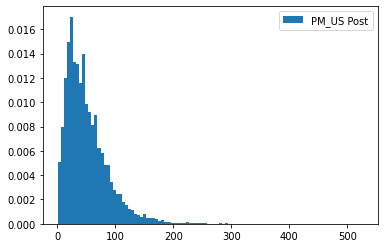

In [409]:
plt.hist(df['PM_US Post'], bins=100, density=True, label='PM_US Post')
plt.legend() #histogam obelezja PM_US Post

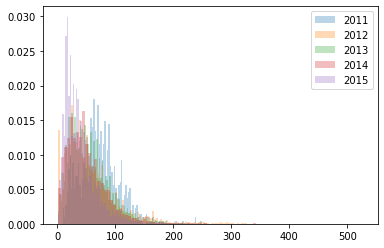

In [131]:
plt.hist(df.loc[df['year']==2011, 'PM_US Post'], bins=100, label = '2011', density=True, alpha=0.3)
plt.hist(df.loc[df['year']==2012, 'PM_US Post'], bins=100, label = '2012', density=True, alpha=0.3)
plt.hist(df.loc[df['year']==2013, 'PM_US Post'], bins=100, label = '2013', density=True, alpha=0.3)
plt.hist(df.loc[df['year']==2014, 'PM_US Post'], bins=100, label = '2014', density=True, alpha=0.3)
plt.hist(df.loc[df['year']==2015, 'PM_US Post'], bins=100, label = '2015', density=True, alpha=0.3)

plt.legend()
plt.show()
#nije relevantan prikaz jer za 2011.godinu imamo mnigo manje podataka i svi su za period jeseni i zime

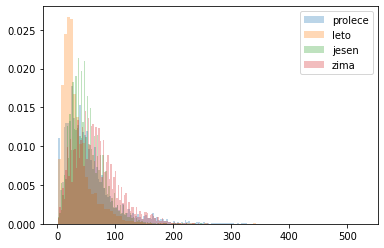

In [132]:
plt.hist(df.loc[df['season']==1, 'PM_US Post'], bins=100, label = 'prolece', density=True, alpha=0.3)
plt.hist(df.loc[df['season']==2, 'PM_US Post'], bins=100, label = 'leto', density=True, alpha=0.3)
plt.hist(df.loc[df['season']==3, 'PM_US Post'], bins=100, label = 'jesen', density=True, alpha=0.3)
plt.hist(df.loc[df['season']==4, 'PM_US Post'], bins=100, label = 'zima', density=True, alpha=0.3)

plt.legend()
plt.show()

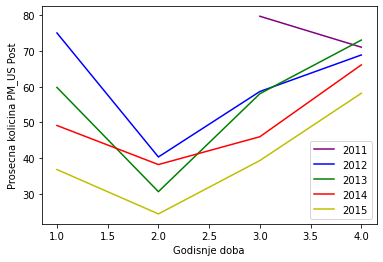

In [133]:
#grupisemo po godinama i godisnjim dobima
df_year_season=df.groupby(by=['year', 'season']).mean()

#Prosecna kolicina PM cestica po godinama i godisnjim dobima
x=np.arange(1, 5, 1) #2011, 2012
x1=np.arange(3, 5, 1)
plt.plot(x1, df_year_season.loc[2011]['PM_US Post'], 'purple', label='2011')
plt.plot(x, df_year_season.loc[2012]['PM_US Post'], 'b', label='2012')
plt.plot(x, df_year_season.loc[2013]['PM_US Post'], 'g', label='2013')
plt.plot(x, df_year_season.loc[2014]['PM_US Post'], 'r', label='2014')
plt.plot(x, df_year_season.loc[2015]['PM_US Post'], 'y', label='2015')
plt.xlabel('Godisnje doba')
plt.ylabel('Prosecna kolicina PM_US Post')
plt.legend();

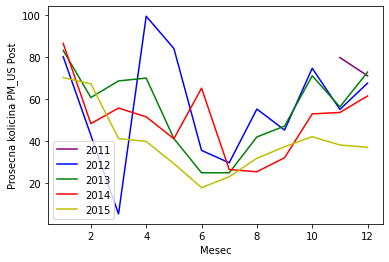

In [134]:
#grupisemo po godinama i mesecima
df_year_month=df.groupby(by=['year', 'month']).mean()

#Prosecna kolicina PM cestica po godinama i mesecima
x=np.arange(1, 13, 1)
plt.plot([11, 12], df_year_month.loc[2011]['PM_US Post'], 'purple', label='2011')
plt.plot([1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], df_year_month.loc[2012]['PM_US Post'], 'b', label='2012')
plt.plot(x, df_year_month.loc[2013]['PM_US Post'], 'g', label='2013')
plt.plot(x, df_year_month.loc[2014]['PM_US Post'], 'r', label='2014')
plt.plot(x, df_year_month.loc[2015]['PM_US Post'], 'y', label='2015')
plt.xlabel('Mesec')
plt.ylabel('Prosecna kolicina PM_US Post')
plt.legend();

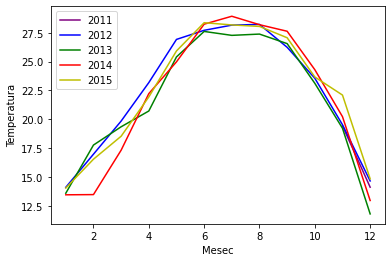

In [135]:
#grupisemo po godinama i mesecima
df_year_month=df.groupby(by=['year', 'month']).mean()

#Prosecna temepratura po godinama i mesecima
x=np.arange(1, 13, 1)
plt.plot([11, 12], df_year_month.loc[2011]['TEMP'], 'purple', label='2011')
plt.plot([1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], df_year_month.loc[2012]['TEMP'], 'b', label='2012')
plt.plot(x, df_year_month.loc[2013]['TEMP'], 'g', label='2013')
plt.plot(x, df_year_month.loc[2014]['TEMP'], 'r', label='2014')
plt.plot(x, df_year_month.loc[2015]['TEMP'], 'y', label='2015')
plt.xlabel('Mesec')
plt.ylabel('Temperatura')
plt.legend();

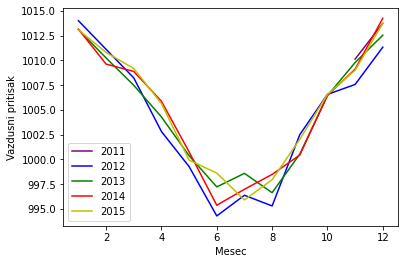

In [481]:
#grupisemo po godinama i mesecima
df_year_month=df.groupby(by=['year', 'month']).mean()

#Prosecan vazdusni pritisak po godinama i mesecima
x=np.arange(1, 13, 1)
plt.plot([11, 12], df_year_month.loc[2011]['PRES'], 'purple', label='2011')
plt.plot([1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], df_year_month.loc[2012]['PRES'], 'b', label='2012')
plt.plot(x, df_year_month.loc[2013]['PRES'], 'g', label='2013')
plt.plot(x, df_year_month.loc[2014]['PRES'], 'r', label='2014')
plt.plot(x, df_year_month.loc[2015]['PRES'], 'y', label='2015')
plt.xlabel('Mesec')
plt.ylabel('Vazdusni pritisak')
plt.legend();

In [411]:
df_year_month=df.groupby(by=['year', 'month']).mean()
df_year_month.loc[2012]['PM_US Post'] #fali 2 mesec
df_year_month.loc[2011]['PM_US Post'] #imamo podatke samo za 11 i 12 mesec


month
11    79.726415
12    71.062774
Name: PM_US Post, dtype: float64

Text(0, 0.5, 'Prosecna kolicina PM_US Post')

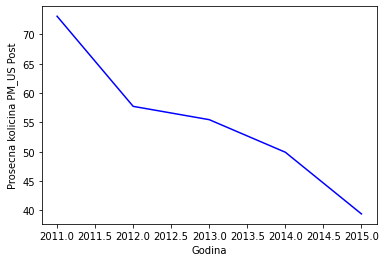

In [412]:
df_year=df.groupby(by=['year']).mean()

#Prosecna kolicina PM cestica po godinama
x=np.arange(2011, 2016, 1)
plt.plot(x, df_year['PM_US Post'], 'blue')
plt.xlabel('Godina')
plt.ylabel('Prosecna kolicina PM_US Post')

Text(0, 0.5, 'Prosecna kolicina PM_US Post')

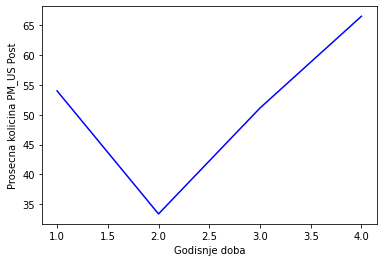

In [138]:
df_season=df.groupby(by=['season']).mean()

#Prosecna kolicina PM cestica po godisnjim dobima(1-prolece, 2-leto, 3-jesen, 4-zima)
x=np.arange(1, 5, 1)
plt.plot(x, df_season['PM_US Post'], 'blue')
plt.xlabel('Godisnje doba')
plt.ylabel('Prosecna kolicina PM_US Post')

(array([0.00033998, 0.00154969, 0.00355006, 0.00907677, 0.0154732 ,
        0.02322166, 0.03004504, 0.0422291 , 0.05600238, 0.0742666 ]),
 array([-11.7 ,  -7.79,  -3.88,   0.03,   3.94,   7.85,  11.76,  15.67,
         19.58,  23.49,  27.4 ]),
 <a list of 10 Patch objects>)

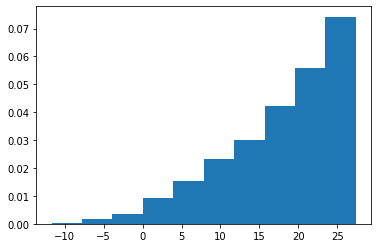

In [139]:
plt.hist(df['DEWP'], density=True, label='PM_US Post')

(array([0.00015635, 0.00111222, 0.00222089, 0.00354276, 0.00767539,
        0.01107246, 0.01365225, 0.0183783 , 0.02587957, 0.03125234]),
 array([ 13. ,  21.7,  30.4,  39.1,  47.8,  56.5,  65.2,  73.9,  82.6,
         91.3, 100. ]),
 <a list of 10 Patch objects>)

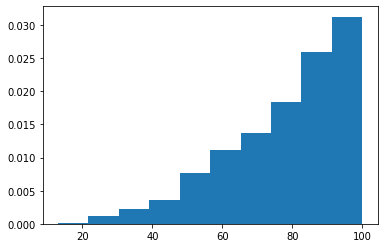

In [140]:
plt.hist(df['HUMI'], density=True, label='PM_US Post')

(array([0.00124698, 0.00839981, 0.01779547, 0.0275635 , 0.03378975,
        0.04338459, 0.07374514, 0.04861499, 0.02222919, 0.00334261]),
 array([ 1.7       ,  5.27000015,  8.84000031, 12.41000046, 15.98000061,
        19.55000076, 23.12000092, 26.69000107, 30.26000122, 33.83000138,
        37.40000153]),
 <a list of 10 Patch objects>)

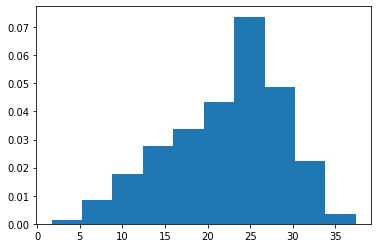

In [141]:
plt.hist(df['TEMP'], density=True, label='PM_US Post')

(array([3.85631201e-05, 7.06990536e-05, 1.18902954e-03, 1.22566450e-02,
        3.80875083e-02, 4.69570260e-02, 4.33449470e-02, 4.16610241e-02,
        2.13446870e-02, 2.95007869e-03]),
 array([ 975.  ,  979.81,  984.62,  989.43,  994.24,  999.05, 1003.86,
        1008.67, 1013.48, 1018.29, 1023.1 ]),
 <a list of 10 Patch objects>)

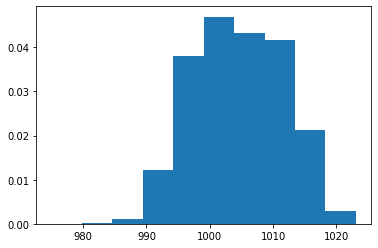

In [142]:
plt.hist(df['PRES'], density=True, label='PM_US Post')

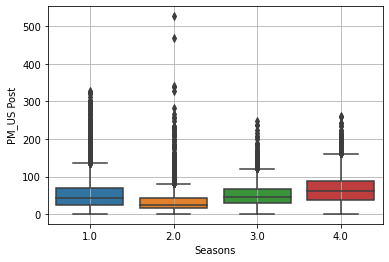

In [413]:
#Analiza obelezja PM cestica po godisnjim dobima(sezonama: 1-prolece, 2-leto, 3-jesen, 4-zima)
sns.boxplot(x='season', y='PM_US Post', data=df)
plt.xlabel('Seasons')
plt.grid()
plt.show()

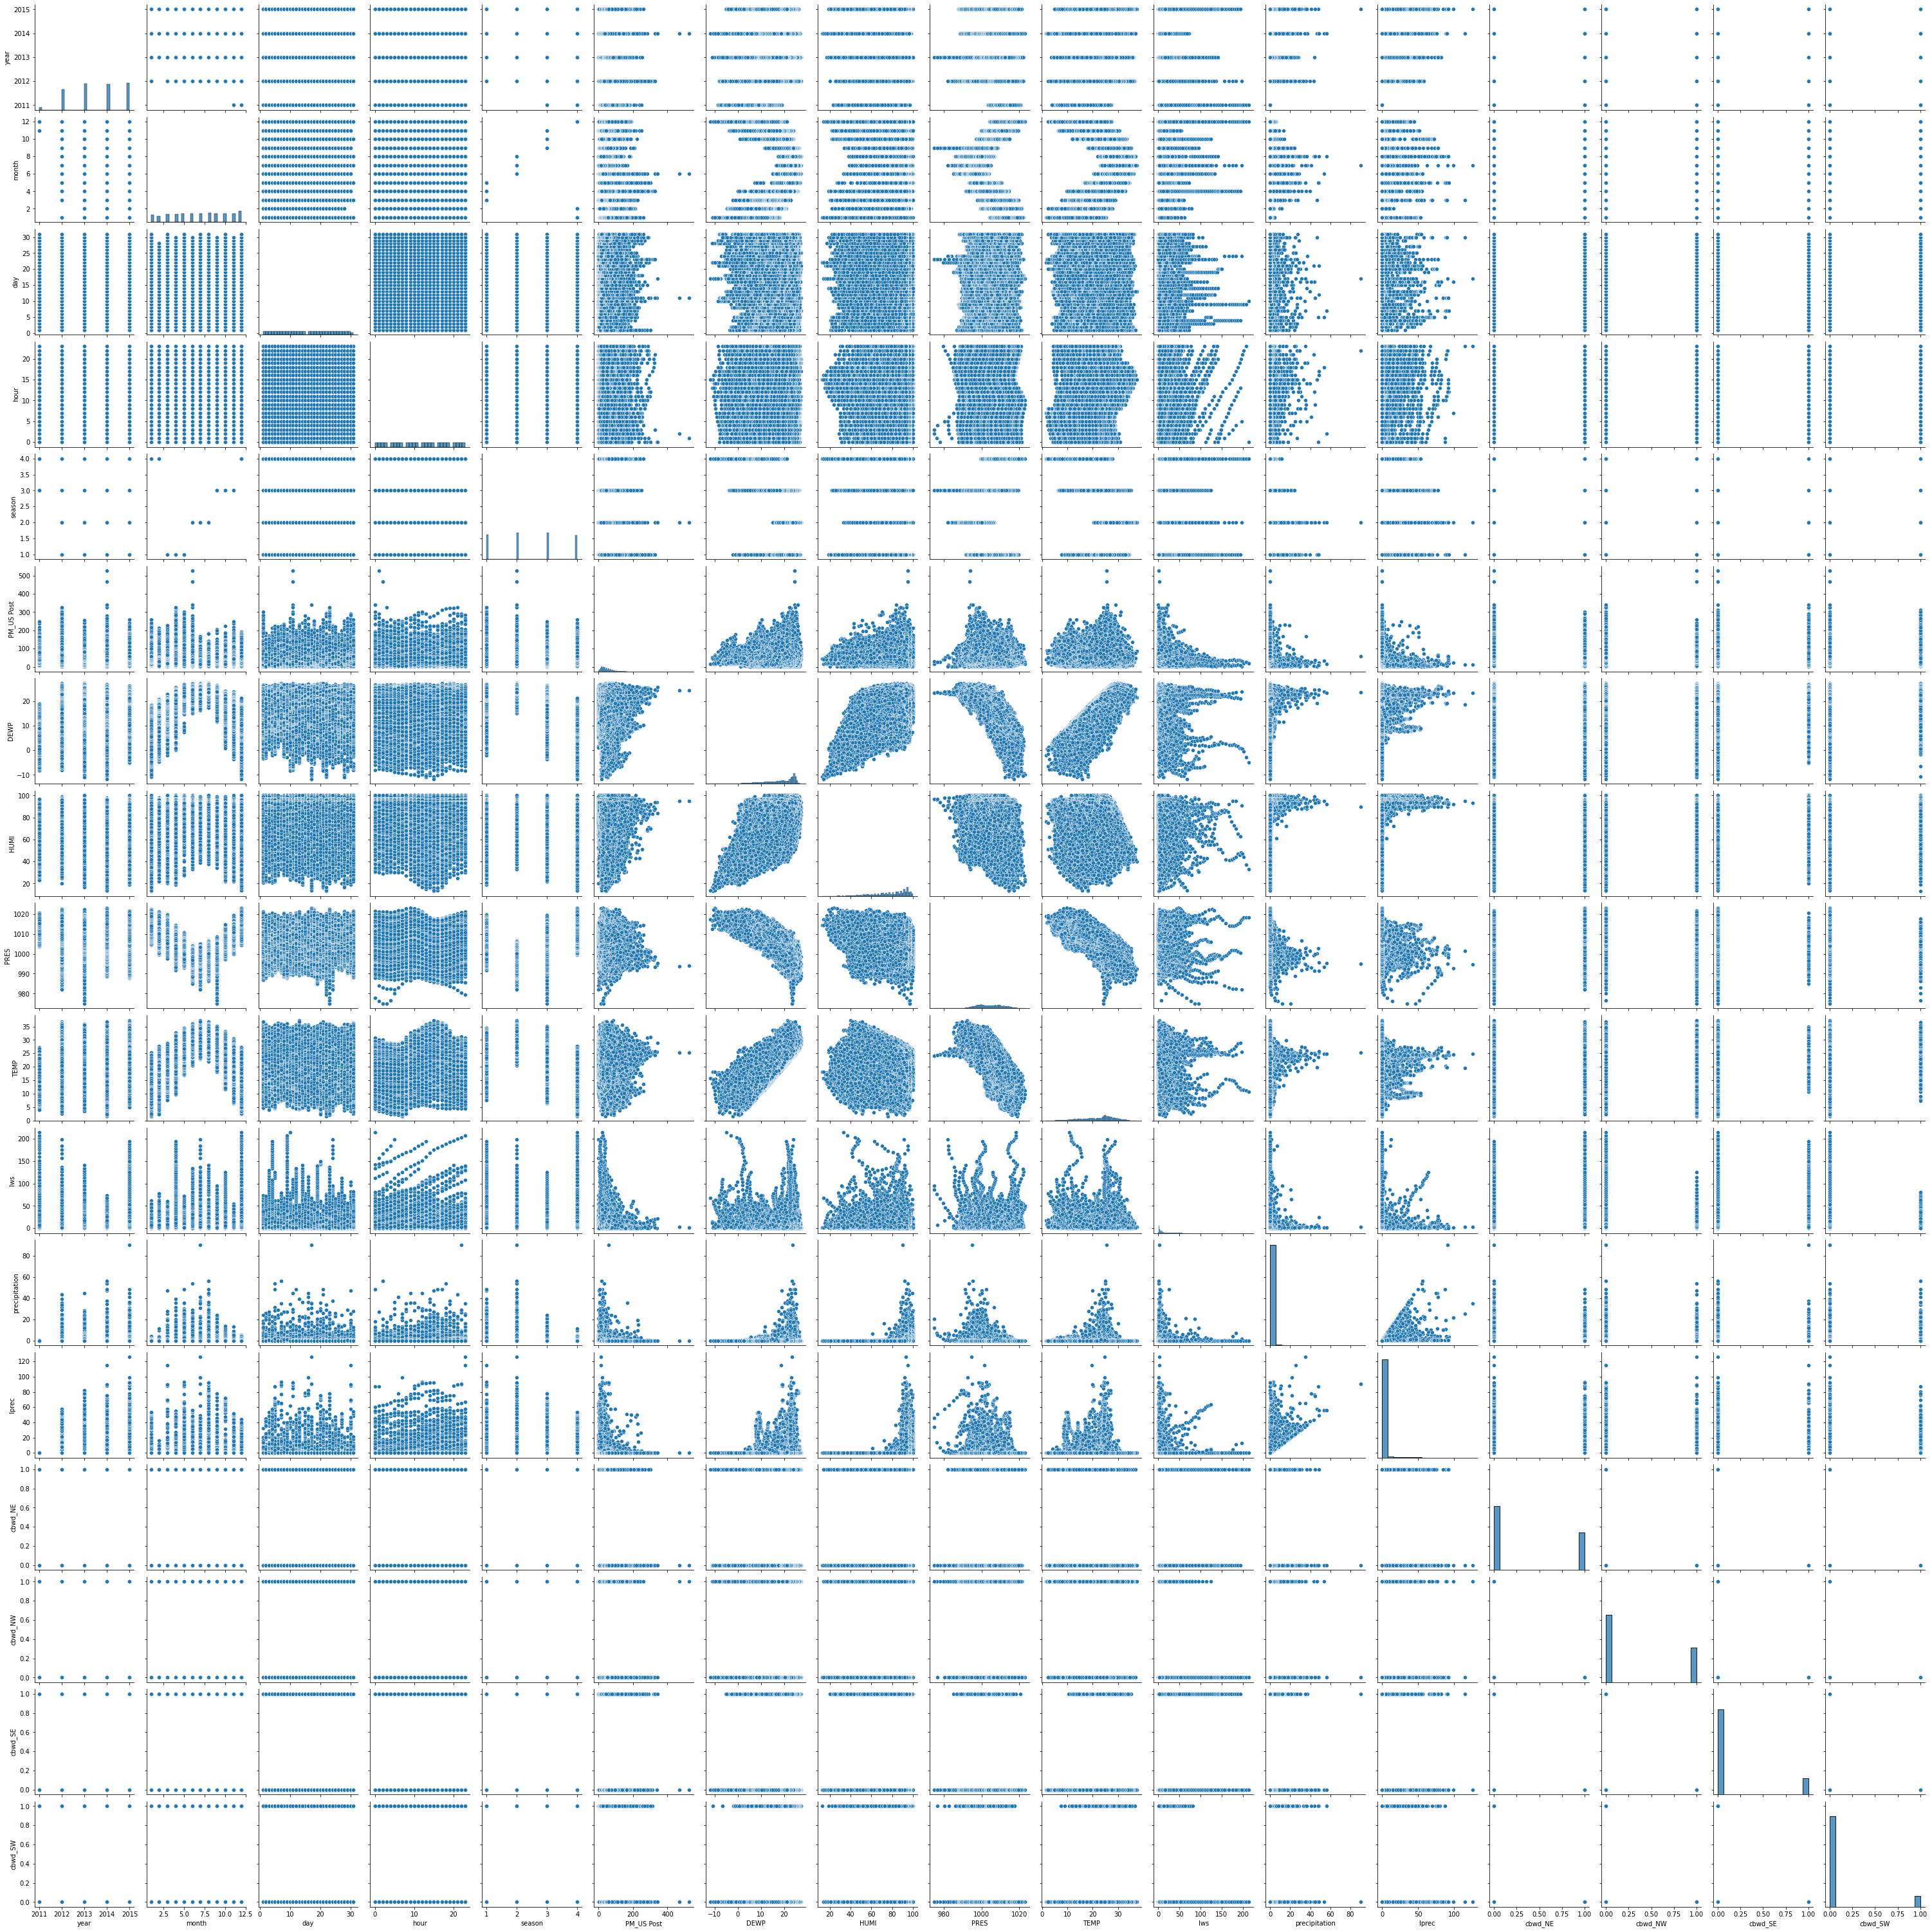

In [144]:
sns.pairplot(df)

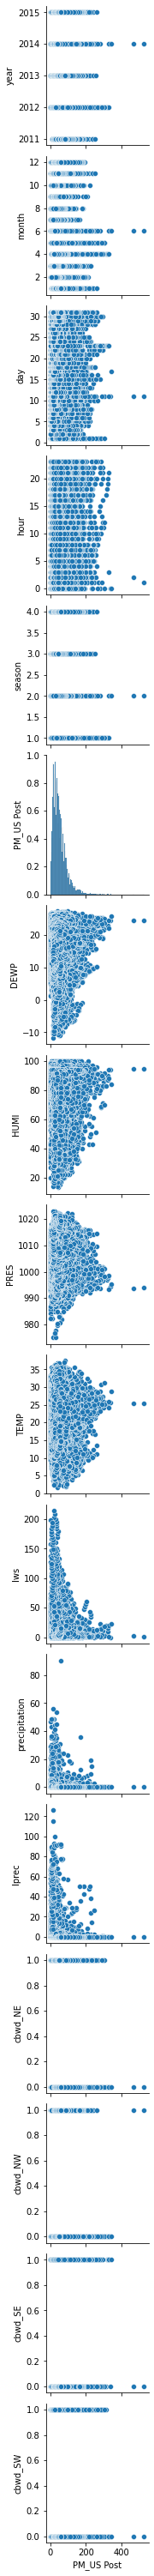

In [145]:
sns.pairplot(df, x_vars=['PM_US Post'])

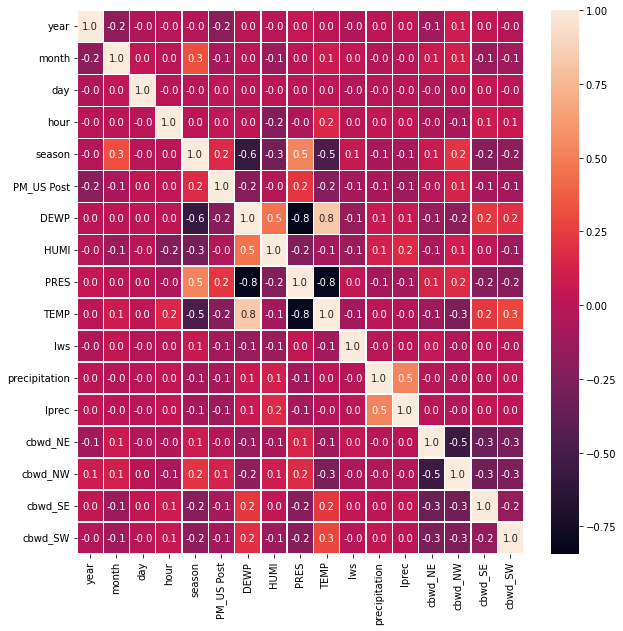

In [414]:
#korelacije obelezja #DEWP i TEMP-poz.kor, PRES i DEWP-neg.kor, PRES i TEMP-neg.kor, DEWP i season-slaba neg.kor.
mat_corr = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(mat_corr, annot=True, fmt=".1f", linewidths=.3)
plt.show()

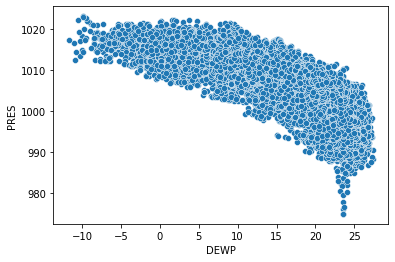

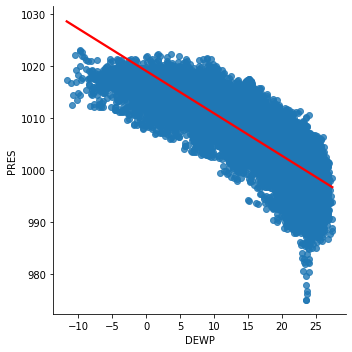

In [147]:
sns.scatterplot(x='DEWP', y='PRES', data=df)
sns.lmplot(x='DEWP', y='PRES', data=df, line_kws={'color': 'red'})

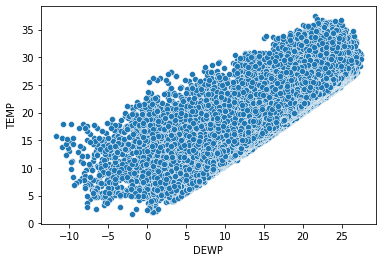

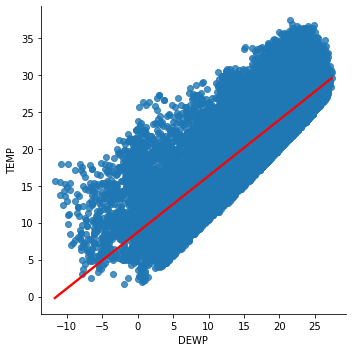

In [148]:
sns.scatterplot(x='DEWP', y='TEMP', data=df)
sns.lmplot(x='DEWP', y='TEMP', data=df, line_kws={'color': 'red'})

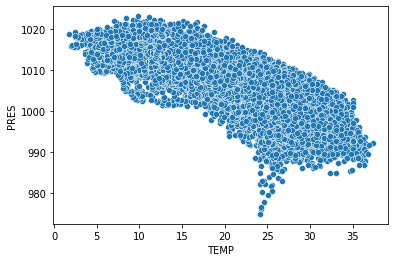

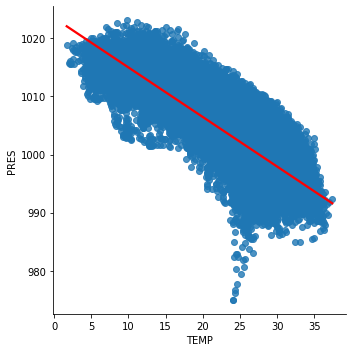

In [149]:
sns.scatterplot(x='TEMP', y='PRES', data=df)
sns.lmplot(x='TEMP', y='PRES', data=df, line_kws={'color': 'red'})

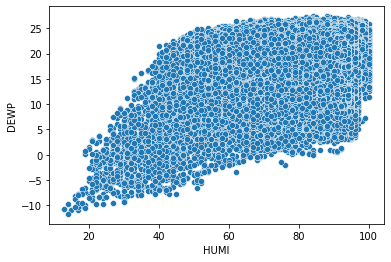

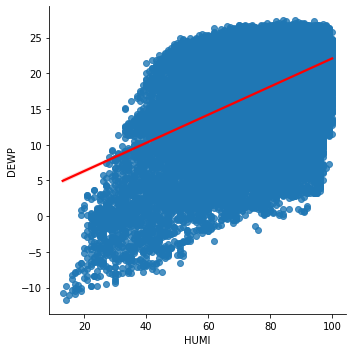

In [150]:
sns.scatterplot(x='HUMI', y='DEWP', data=df)
sns.lmplot(x='HUMI', y='DEWP', data=df, line_kws={'color': 'red'})

Text(0, 0.5, 'padavine na sat')

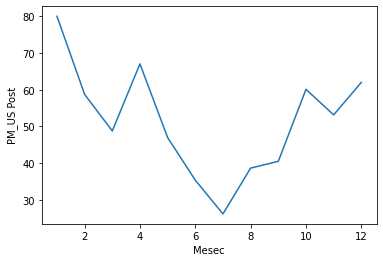

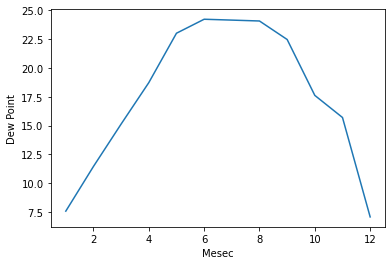

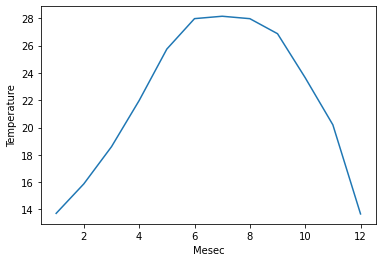

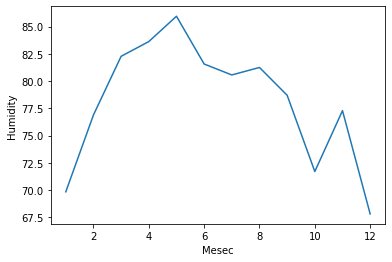

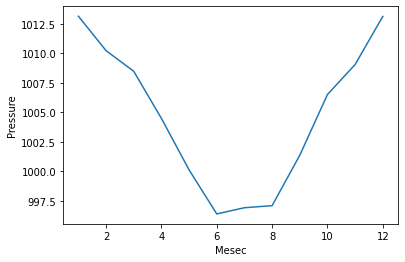

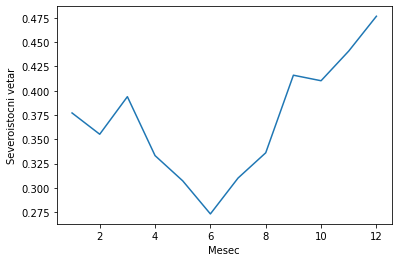

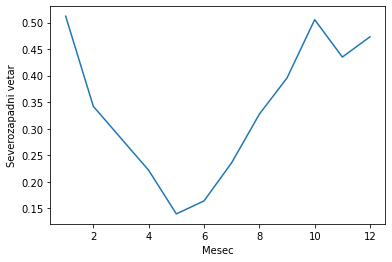

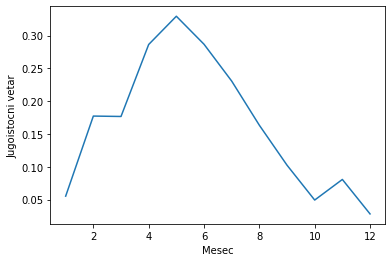

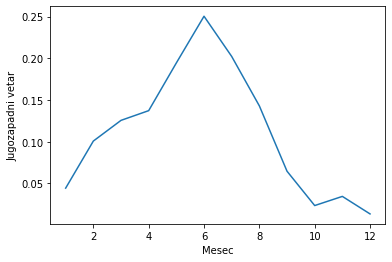

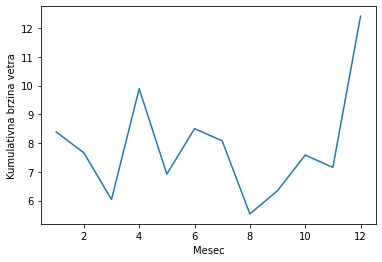

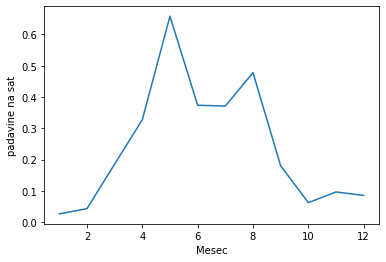

In [151]:
#Prosecna kolicina PM cestica po mesecima
dfm=df.groupby(by='month').mean()
x=np.arange(1,13,1)
y=dfm['PM_US Post']

plt.plot(x, y, label='PM_US Post')
plt.xlabel('Mesec')
plt.ylabel('PM_US Post')

#Promena temperature kondenzacije tokom meseci
y1=dfm['DEWP']
plt.figure()
plt.plot(x, y1, label='Dew Point')
plt.xlabel('Mesec')
plt.ylabel('Dew Point')

#Promena temperature tokom meseci
y1=dfm['TEMP']
plt.figure()
plt.plot(x, y1, label='Temperature')
plt.xlabel('Mesec')
plt.ylabel('Temperature')

#Promena vlaznosti vazduha tokom meseci
y1=dfm['HUMI']
plt.figure()
plt.plot(x, y1, label='Humidity')
plt.xlabel('Mesec')
plt.ylabel('Humidity')

#Promena vazdusnog pritiska tokom meseci
y1=dfm['PRES']
plt.figure()
plt.plot(x, y1, label='Pressure')
plt.xlabel('Mesec')
plt.ylabel('Pressure')

#Promena Severoistocnog vetra tokom meseci
y1=dfm['cbwd_NE']
plt.figure()
plt.plot(x, y1, label='Severoistocni vetar')
plt.xlabel('Mesec')
plt.ylabel('Severoistocni vetar')

#Promena Severozapadnog vetra tokom meseci
y1=dfm['cbwd_NW']
plt.figure()
plt.plot(x, y1, label='Severozapadni vetar')
plt.xlabel('Mesec')
plt.ylabel('Severozapadni vetar')

#Promena Jugoistocnog vetra tokom meseci
y1=dfm['cbwd_SE']
plt.figure()
plt.plot(x, y1, label='Jugoistocni vetar')
plt.xlabel('Mesec')
plt.ylabel('Jugoistocni vetar')

#Promena Jugozapadnog vetra tokom meseci
y1=dfm['cbwd_SW']
plt.figure()
plt.plot(x, y1, label='Jugozapadni vetar')
plt.xlabel('Mesec')
plt.ylabel('Jugozapadni vetar')

#Promena kumulativne brzine vetra tokom meseci
y1=dfm['Iws']
plt.figure()
plt.plot(x, y1, label='Kumulativna brzina vetra')
plt.xlabel('Mesec')
plt.ylabel('Kumulativna brzina vetra')

#Promena padavina na sat tokom meseci
y1=dfm['precipitation']
plt.figure()
plt.plot(x, y1, label='padavine')
plt.xlabel('Mesec')
plt.ylabel('padavine na sat')

Text(0, 0.5, 'Pressure')

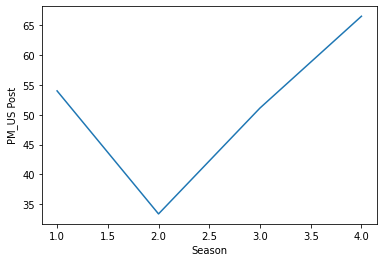

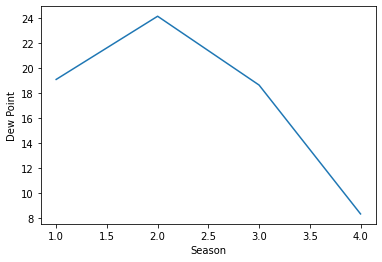

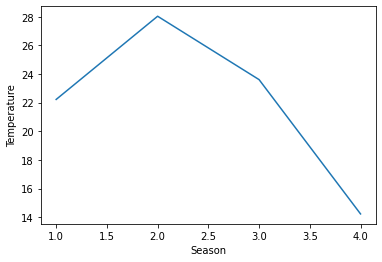

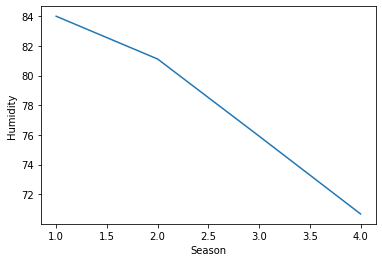

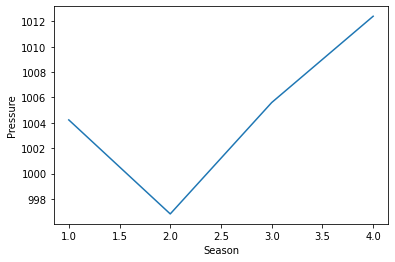

In [152]:
#prosecna kolicina PM cestica po godisnjim dobima(1-prolece, 2-leto, 3-jesen, 4-zima)
df_seasons=df.groupby(by='season').mean()
x=np.arange(1,5,1)
y=df_seasons['PM_US Post']

plt.plot(x, y, label='PM_US Post')
plt.xlabel('Season')
plt.ylabel('PM_US Post')

#Promena temperature kondenzacije tokom meseci
y1=df_seasons['DEWP']
plt.figure()
plt.plot(x, y1, label='Dew Point')
plt.xlabel('Season')
plt.ylabel('Dew Point')

#Promena temperature tokom meseci
y1=df_seasons['TEMP']
plt.figure()
plt.plot(x, y1, label='Temperature')
plt.xlabel('Season')
plt.ylabel('Temperature')

#Promena vlaznosti vazduha tokom meseci
y1=df_seasons['HUMI']
plt.figure()
plt.plot(x, y1, label='Humidity')
plt.xlabel('Season')
plt.ylabel('Humidity')

#Promena vazdusnog pritiska tokom meseci
y1=df_seasons['PRES']
plt.figure()
plt.plot(x, y1, label='Pressure')
plt.xlabel('Season')
plt.ylabel('Pressure')

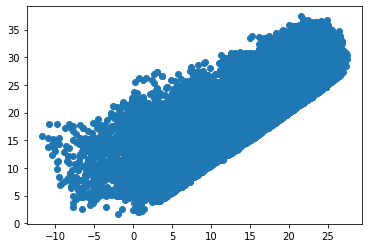

In [153]:
plt.scatter(df['DEWP'], df['TEMP'])
plt.show()

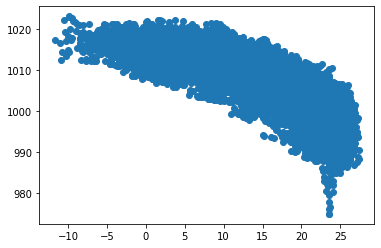

In [154]:
plt.scatter(df['DEWP'], df['PRES'])
plt.show()

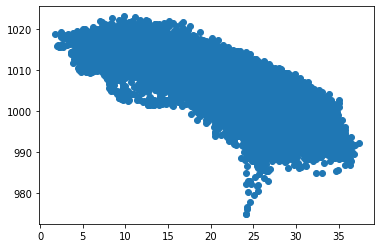

In [155]:
plt.scatter(df['TEMP'], df['PRES'])
plt.show()

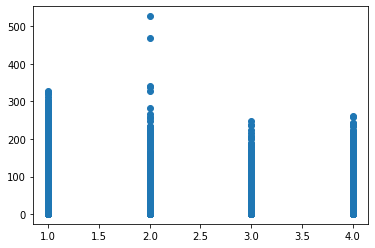

In [156]:
plt.scatter(df['season'], df['PM_US Post'])
plt.show()

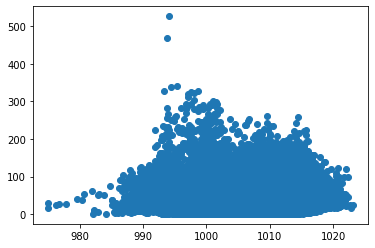

In [157]:
plt.scatter(df['PRES'], df['PM_US Post'])
plt.show()

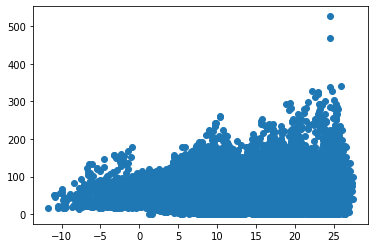

In [158]:
plt.scatter(df['DEWP'], df['PM_US Post'])
plt.show()

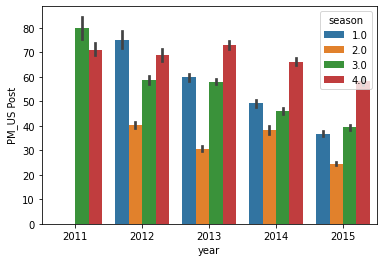

In [159]:
sns.barplot(data=df, y='PM_US Post', x='year', hue='season') #kolicina PM cestica po godinama i godisnjim dobima za svaku godinu

In [415]:
x = df.drop(['PM_US Post'], axis=1).copy()
y = df['PM_US Post'].copy()

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [416]:
x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, test_size=0.5, random_state=42)

In [417]:
#evaluacija modela
def model_evaluation(y_test, y_predicted, N, d):
    mse = mean_squared_error(y_test, y_predicted) # np.mean((y_test-y_predicted)**2)
    mae = mean_absolute_error(y_test, y_predicted) # np.mean(np.abs(y_test-y_predicted))
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_predicted)
    r2_adj = 1-(1-r2)*(N-1)/(N-d-1)

    # printing values
    print('Mean squared error: ', mse)
    print('Mean absolute error: ', mae)
    print('Root mean squared error: ', rmse)
    print('R2 score: ', r2)
    print('R2 adjusted score: ', r2_adj)
    
    # Uporedni prikaz nekoliko pravih i predvidjenih vrednosti
    res=pd.concat([pd.DataFrame(y.values), pd.DataFrame(y_predicted)], axis=1)
    res.columns = ['y', 'y_pred']
    print(res.head(20))

Mean squared error:  1143.7948572193593
Mean absolute error:  24.186606703026985
Root mean squared error:  33.82003632788349
R2 score:  0.15689191533212754
R2 adjusted score:  0.15629568420042872
       y     y_pred
0   48.0  47.621544
1   63.0  28.323209
2   71.0  53.597087
3   79.0  78.098763
4   78.0  58.145200
5   81.0  86.466524
6   98.0  49.517065
7   96.0  62.812193
8   88.0  47.584905
9   66.0  63.267883
10  58.0  44.553396
11  64.0  55.122798
12  55.0  50.630711
13  50.0  63.360628
14  64.0  18.383249
15  89.0  38.195885
16  84.0  81.290612
17  77.0  58.741412
18  75.0  41.856794
19  79.0  59.337479


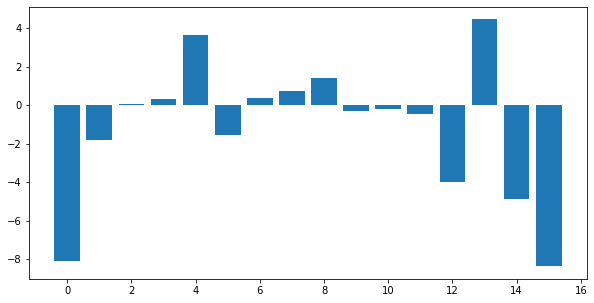

koeficijenti:  [-8.08064917 -1.79124433  0.04281751  0.3030882   3.6392585  -1.55436708
  0.3885815   0.7325281   1.39167239 -0.30592717 -0.20446599 -0.4589341
 -4.01160093  4.46091415 -4.87543843 -8.37129569]


In [258]:
# Osnovni oblik linearne regresije sa hipotezom y=b0+b1x1+b2x2+...+bnxn
# Inicijalizacija
first_regression_model = LinearRegression(fit_intercept=True) #da li zelimo da imamo slobodan clan u hipotezi

# Obuka
first_regression_model.fit(x_train, y_train)

# Testiranje
y_predicted = first_regression_model.predict(x_val)

# Evaluacija
model_evaluation(y_val, y_predicted, x_train.shape[0], x_train.shape[1])

# Ilustracija koeficijenata
plt.figure(figsize=(10,5))
plt.bar(range(len(first_regression_model.coef_)),first_regression_model.coef_)
plt.show()
print("koeficijenti: ", first_regression_model.coef_)

In [259]:
#Selekcija obelezja
X = sm.add_constant(x_train)

second_regression_model = sm.OLS(y_train, X.astype('float')).fit()
second_regression_model.summary()

#day i precipitation imaju vrednost p > 0.01, pa izbacujemo jedno po jedno obelezje

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             PM_US Post   R-squared:                       0.159
Model:                            OLS   Adj. R-squared:                  0.158
Method:                 Least Squares   F-statistic:                     266.6
Date:                Thu, 05 Jan 2023   Prob (F-statistic):               0.00
Time:                        21:51:41   Log-Likelihood:            -1.1196e+05
No. Observations:               22642   AIC:                         2.240e+05
Df Residuals:                   22625   BIC:                         2.241e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1.556e+04    405.038     38.405      0.000    1.48e+04    1.63e+04
year             -8.0806      0.203    -39.866      0.000      -8.478      -7.683
month            -1.7912      0.077    -23.377      0.000      -1.941      -1.641
day               0.0428      0.026      1.662      0.096      -0.008       0.093
hour              0.3031      0.034      8.848      0.000       0.236       0.370
season            3.6393      0.281     12.963      0.000       3.089       4.190
DEWP             -1.5544      0.374     -4.154      0.000      -2.288      -0.821
HUMI              0.3886      0.092      4.230      0.000       0.209       0.569
PRES              0.7325      0.068     10.767      0.000       0.599       0.866
TEMP              1.3917      0.375      3.713      0.000       0.657       2.126
Iws              -0.3059      0.019    -16.240      0.000      -0.343      -0.269
precipitation    -0.2045      0.142     -1.438      0.151      -0.483       0.074
Iprec            -0.4589      0.044    -10.328      0.000      -0.546      -0.372
cbwd_NE          -4.0116      1.680     -2.388      0.017      -7.305      -0.719
cbwd_NW           4.4609      1.682      2.652      0.008       1.163       7.759
cbwd_SE          -4.8754      1.734     -2.812      0.005      -8.273      -1.478
cbwd_SW          -8.3713      1.788     -4.681      0.000     -11.876      -4.866
==============================================================================
Omnibus:                     9680.608   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            76515.766
Skew:                           1.870   Prob(JB):                         0.00
Kurtosis:                      11.192   Cond. No.                     4.04e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.04e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [260]:
x.drop('day', axis=1, inplace=True)

In [261]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [262]:
x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, test_size=0.5, random_state=42)

In [263]:
X = sm.add_constant(x_train)

third_regression_model = sm.OLS(y_train, X.astype('float')).fit()
third_regression_model.summary()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             PM_US Post   R-squared:                       0.159
Model:                            OLS   Adj. R-squared:                  0.158
Method:                 Least Squares   F-statistic:                     284.2
Date:                Thu, 05 Jan 2023   Prob (F-statistic):               0.00
Time:                        21:51:50   Log-Likelihood:            -1.1197e+05
No. Observations:               22642   AIC:                         2.240e+05
Df Residuals:                   22626   BIC:                         2.241e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1.559e+04    404.616     38.523      0.000    1.48e+04    1.64e+04
year             -8.0991      0.202    -40.015      0.000      -8.496      -7.702
month            -1.7883      0.077    -23.345      0.000      -1.939      -1.638
hour              0.3030      0.034      8.844      0.000       0.236       0.370
season            3.6379      0.281     12.958      0.000       3.088       4.188
DEWP             -1.5714      0.374     -4.201      0.000      -2.305      -0.838
HUMI              0.3933      0.092      4.283      0.000       0.213       0.573
PRES              0.7385      0.068     10.869      0.000       0.605       0.872
TEMP              1.4136      0.375      3.773      0.000       0.679       2.148
Iws              -0.3065      0.019    -16.272      0.000      -0.343      -0.270
precipitation    -0.2049      0.142     -1.441      0.150      -0.484       0.074
Iprec            -0.4593      0.044    -10.335      0.000      -0.546      -0.372
cbwd_NE          -4.0185      1.680     -2.392      0.017      -7.312      -0.725
cbwd_NW           4.4720      1.682      2.658      0.008       1.174       7.770
cbwd_SE          -4.8238      1.733     -2.783      0.005      -8.221      -1.426
cbwd_SW          -8.3580      1.788     -4.674      0.000     -11.863      -4.853
==============================================================================
Omnibus:                     9683.042   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            76587.928
Skew:                           1.871   Prob(JB):                         0.00
Kurtosis:                      11.197   Cond. No.                     4.03e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.03e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [264]:
x.drop('precipitation', axis=1, inplace=True)

In [265]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [266]:
x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, test_size=0.5, random_state=42)

In [267]:
X = sm.add_constant(x_train)

third_regression_model = sm.OLS(y_train, X.astype('float')).fit()
third_regression_model.summary()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             PM_US Post   R-squared:                       0.158
Model:                            OLS   Adj. R-squared:                  0.158
Method:                 Least Squares   F-statistic:                     304.4
Date:                Thu, 05 Jan 2023   Prob (F-statistic):               0.00
Time:                        21:51:59   Log-Likelihood:            -1.1197e+05
No. Observations:               22642   AIC:                         2.240e+05
Df Residuals:                   22627   BIC:                         2.241e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.559e+04    404.625     38.524      0.000    1.48e+04    1.64e+04
year          -8.1016      0.202    -40.028      0.000      -8.498      -7.705
month         -1.7890      0.077    -23.353      0.000      -1.939      -1.639
hour           0.3017      0.034      8.810      0.000       0.235       0.369
season         3.6466      0.281     12.992      0.000       3.096       4.197
DEWP          -1.5631      0.374     -4.180      0.000      -2.296      -0.830
HUMI           0.3911      0.092      4.259      0.000       0.211       0.571
PRES           0.7426      0.068     10.939      0.000       0.610       0.876
TEMP           1.4095      0.375      3.762      0.000       0.675       2.144
Iws           -0.3060      0.019    -16.246      0.000      -0.343      -0.269
Iprec         -0.4911      0.039    -12.743      0.000      -0.567      -0.416
cbwd_NE       -4.0336      1.680     -2.401      0.016      -7.327      -0.740
cbwd_NW        4.4620      1.682      2.652      0.008       1.164       7.760
cbwd_SE       -4.8370      1.733     -2.791      0.005      -8.234      -1.440
cbwd_SW       -8.4159      1.788     -4.707      0.000     -11.920      -4.912
==============================================================================
Omnibus:                     9682.009   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            76552.065
Skew:                           1.870   Prob(JB):                         0.00
Kurtosis:                      11.195   Cond. No.                     4.03e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.03e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [268]:
x.drop('cbwd_NE', axis=1, inplace=True)

In [269]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [270]:
x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, test_size=0.5, random_state=42)

In [271]:
X = sm.add_constant(x_train)

third_regression_model = sm.OLS(y_train, X.astype('float')).fit()
third_regression_model.summary()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             PM_US Post   R-squared:                       0.158
Model:                            OLS   Adj. R-squared:                  0.158
Method:                 Least Squares   F-statistic:                     327.3
Date:                Thu, 05 Jan 2023   Prob (F-statistic):               0.00
Time:                        21:52:08   Log-Likelihood:            -1.1197e+05
No. Observations:               22642   AIC:                         2.240e+05
Df Residuals:                   22628   BIC:                         2.241e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.556e+04    404.447     38.462      0.000    1.48e+04    1.63e+04
year          -8.0877      0.202    -39.971      0.000      -8.484      -7.691
month         -1.7944      0.077    -23.431      0.000      -1.944      -1.644
hour           0.3029      0.034      8.846      0.000       0.236       0.370
season         3.6600      0.281     13.041      0.000       3.110       4.210
DEWP          -1.5820      0.374     -4.231      0.000      -2.315      -0.849
HUMI           0.3987      0.092      4.345      0.000       0.219       0.579
PRES           0.7421      0.068     10.931      0.000       0.609       0.875
TEMP           1.4330      0.375      3.826      0.000       0.699       2.167
Iws           -0.3089      0.019    -16.438      0.000      -0.346      -0.272
Iprec         -0.4915      0.039    -12.752      0.000      -0.567      -0.416
cbwd_NW        8.2826      0.546     15.168      0.000       7.212       9.353
cbwd_SE       -1.0357      0.705     -1.468      0.142      -2.418       0.347
cbwd_SW       -4.6046      0.822     -5.599      0.000      -6.216      -2.993
==============================================================================
Omnibus:                     9689.783   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            76773.506
Skew:                           1.871   Prob(JB):                         0.00
Kurtosis:                      11.208   Cond. No.                     4.03e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.03e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [272]:
x.drop('cbwd_SE', axis=1, inplace=True)

In [273]:
x.shape

(32347, 12)

In [274]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, shuffle=True, random_state=42)

In [275]:
x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, test_size=0.5, shuffle=True, random_state=42)

In [276]:
X = sm.add_constant(x_train)

third_regression_model = sm.OLS(y_train, X.astype('float')).fit()
third_regression_model.summary()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             PM_US Post   R-squared:                       0.158
Model:                            OLS   Adj. R-squared:                  0.158
Method:                 Least Squares   F-statistic:                     354.3
Date:                Thu, 05 Jan 2023   Prob (F-statistic):               0.00
Time:                        21:52:20   Log-Likelihood:            -1.1197e+05
No. Observations:               22642   AIC:                         2.240e+05
Df Residuals:                   22629   BIC:                         2.241e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.558e+04    404.172     38.543      0.000    1.48e+04    1.64e+04
year          -8.1000      0.202    -40.066      0.000      -8.496      -7.704
month         -1.7798      0.076    -23.438      0.000      -1.929      -1.631
hour           0.3000      0.034      8.776      0.000       0.233       0.367
season         3.6771      0.280     13.113      0.000       3.127       4.227
DEWP          -1.6147      0.373     -4.326      0.000      -2.346      -0.883
HUMI           0.4059      0.092      4.429      0.000       0.226       0.585
PRES           0.7439      0.068     10.958      0.000       0.611       0.877
TEMP           1.4526      0.374      3.881      0.000       0.719       2.186
Iws           -0.3107      0.019    -16.566      0.000      -0.347      -0.274
Iprec         -0.4924      0.039    -12.777      0.000      -0.568      -0.417
cbwd_NW        8.5268      0.520     16.393      0.000       7.507       9.546
cbwd_SW       -4.2114      0.778     -5.416      0.000      -5.735      -2.687
==============================================================================
Omnibus:                     9673.274   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            76366.934
Skew:                           1.869   Prob(JB):                         0.00
Kurtosis:                      11.184   Cond. No.                     4.03e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.03e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Mean squared error:  1144.2437580596545
Mean absolute error:  24.212983456131035
Root mean squared error:  33.826672287703005
R2 score:  0.15656102389186766
R2 adjusted score:  0.15611375411798034
       y     y_pred
0   48.0  47.997093
1   63.0  29.204280
2   71.0  53.933657
3   79.0  73.670274
4   78.0  58.340658
5   81.0  86.643622
6   98.0  49.370841
7   96.0  62.470969
8   88.0  47.615665
9   66.0  64.269392
10  58.0  43.977634
11  64.0  55.537398
12  55.0  50.174679
13  50.0  63.207313
14  64.0  18.803017
15  89.0  37.883124
16  84.0  81.103112
17  77.0  58.685283
18  75.0  43.403678
19  79.0  59.452857


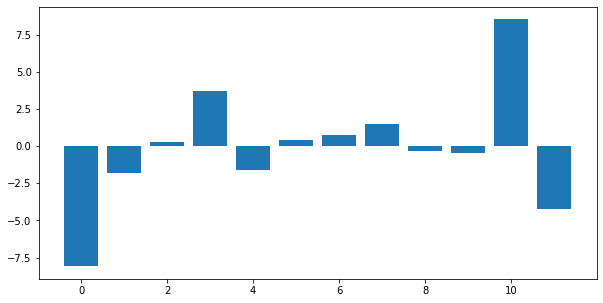

koeficijenti:  [-8.10003671 -1.77977843  0.30002402  3.67712895 -1.61473387  0.40586833
  0.74385475  1.4525764  -0.31069966 -0.49243711  8.5268367  -4.21139211]


In [277]:
#model posle izvresene selekcije obelezja(izbaceni day, precipitation, cbwd_NE, cbwd_SE)
# Inicijalizacija
model_as = LinearRegression(fit_intercept=True) #da li zelimo da imamo slobodan clan u hipotezi

# Obuka
model_as.fit(x_train, y_train)

# Testiranje
y_predicted = model_as.predict(x_val)

# Evaluacija
model_evaluation(y_val, y_predicted, x_train.shape[0], x_train.shape[1])

# Ilustracija koeficijenata
plt.figure(figsize=(10,5))
plt.bar(range(len(model_as.coef_)),model_as.coef_)
plt.show()
print("koeficijenti: ", model_as.coef_)

In [278]:
numeric_feats = [item for item in x.columns if 'cbwd' not in item]
dummy_feats = [item for item in x.columns if 'cbwd' in item]
#dummy_feats

['cbwd_NW', 'cbwd_SW']

In [286]:
numeric_feats

['year',
 'month',
 'hour',
 'season',
 'DEWP',
 'HUMI',
 'PRES',
 'TEMP',
 'Iws',
 'Iprec']

In [290]:
#Standardizacija obelezja
scaler=StandardScaler()
scaler.fit(x_train[numeric_feats])
x_train_std=pd.DataFrame(scaler.transform(x_train[numeric_feats]), columns = numeric_feats)
x_val_std=pd.DataFrame(scaler.transform(x_val[numeric_feats]), columns = numeric_feats)
x_train_std=pd.concat([x_train_std, x_train[dummy_feats].reset_index(drop=True)], axis=1)
x_val_std=pd.concat([x_val_std, x_val[dummy_feats].reset_index(drop=True)], axis=1)
#x_train_std.columns=list(x.columns)
#x_val_std.columns=list(x.columns)
x_val_std

year       0
month      0
hour       0
season     0
DEWP       0
HUMI       0
PRES       0
TEMP       0
Iws        0
Iprec      0
cbwd_NW    0
cbwd_SW    0
dtype: int64

In [301]:
#Standardizacija test skupa
x_test_std=pd.DataFrame(scaler.transform(x_test[numeric_feats]), columns = numeric_feats)
x_test_std=pd.concat([x_test_std, x_test[dummy_feats].reset_index(drop=True)], axis=1)
#x_test_std.columns=list(x.columns)
x_test_std

year     month      hour    season      DEWP      HUMI      PRES  \
0    -0.447123 -0.852254 -0.221290 -1.368038  0.966597  0.772832 -0.419149   
1    -0.447123 -1.729990  1.368137  1.366347 -1.887665 -0.179498  1.074781   
2    -1.309086  0.318061 -0.943757 -0.456576  0.786474  1.189476 -0.921913   
3    -0.447123  0.025482  0.645670 -0.456576  1.008164 -0.774703 -0.850090   
4     1.276803 -1.144833 -0.654770 -1.368038 -0.391256  0.653790  0.658205   
...        ...       ...       ...       ...       ...       ...       ...   
4847  1.276803 -1.437411 -1.232743  1.366347 -0.931626  0.534749  1.764288   
4848 -1.309086  1.488376 -0.799263  1.366347 -1.111749  0.653790  0.931134   
4849  0.414840  0.610639  1.368137  0.454886  0.952741  0.237146 -0.965008   
4850 -0.447123  1.488376  0.356683  1.366347 -2.926838 -3.155526  0.931134   
4851  0.414840  0.318061  1.368137 -0.456576  0.994308 -0.179498 -0.677713   

          TEMP       Iws     Iprec  cbwd_NW  cbwd_SW  
0     0.622812 -0.494907 -0.172794        0        1  
1    -2.103834 -0.311323 -0.172794        1        0  
2     0.228963 -0.423070 -0.172794        1        0  
3     1.546842 -0.343251 -0.172794        1        0  
4    -0.816251  0.111718 -0.172794        0        0  
...        ...       ...       ...      ...      ...  
4847 -1.361580 -0.143703 -0.172794        1        0  
4848 -1.634245 -0.231504 -0.139811        1        0  
4849  0.880329  1.548459 -0.172794        1        0  
4850 -0.831399 -0.000029 -0.172794        1        0  
4851  1.168141 -0.462979 -0.172794        0        0  

[4852 rows x 12 columns]

Mean squared error:  1144.243758059656
Mean absolute error:  24.212983456130587
Root mean squared error:  33.826672287703026
R2 score:  0.15656102389186655
R2 adjusted score:  0.15611375411797912
       y     y_pred
0   48.0  47.997093
1   63.0  29.204280
2   71.0  53.933657
3   79.0  73.670274
4   78.0  58.340658
5   81.0  86.643622
6   98.0  49.370841
7   96.0  62.470969
8   88.0  47.615665
9   66.0  64.269392
10  58.0  43.977634
11  64.0  55.537398
12  55.0  50.174679
13  50.0  63.207313
14  64.0  18.803017
15  89.0  37.883124
16  84.0  81.103112
17  77.0  58.685283
18  75.0  43.403678
19  79.0  59.452857


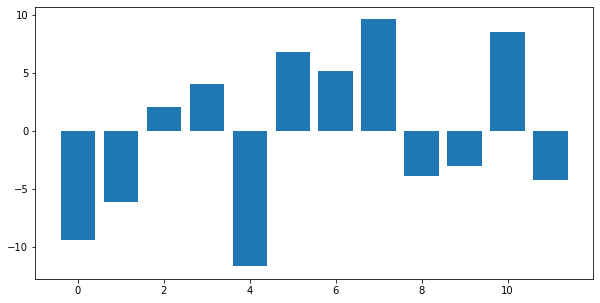

koeficijenti:  [ -9.39719668  -6.08307584   2.07638656   4.03432072 -11.65398303
   6.81895838   5.17834804   9.58920879  -3.89255331  -2.98600595
   8.5268367   -4.21139211]


In [291]:
# Model linearne regresije sa hipotezom y=b0+b1x1+b2x2+...+bnxn posle selekcije i standardizacije obelezja
# Inicijalizacija
model_std = LinearRegression(fit_intercept=True) #da li zelimo da imamo slobodan clan u hipotezi

# Obuka
model_std.fit(x_train_std, y_train)

# Testiranje
y_predicted = model_std.predict(x_val_std)

# Evaluacija
model_evaluation(y_val, y_predicted, x_train_std.shape[0], x_train_std.shape[1])

# Ilustracija koeficijenata
plt.figure(figsize=(10,5))
plt.bar(range(len(model_std.coef_)),model_std.coef_)
plt.show()
print("koeficijenti: ", model_std.coef_)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x0 x1', 'x0 x2', 'x0 x3', 'x0 x4', 'x0 x5', 'x0 x6', 'x0 x7', 'x0 x8', 'x0 x9', 'x0 x10', 'x0 x11', 'x1 x2', 'x1 x3', 'x1 x4', 'x1 x5', 'x1 x6', 'x1 x7', 'x1 x8', 'x1 x9', 'x1 x10', 'x1 x11', 'x2 x3', 'x2 x4', 'x2 x5', 'x2 x6', 'x2 x7', 'x2 x8', 'x2 x9', 'x2 x10', 'x2 x11', 'x3 x4', 'x3 x5', 'x3 x6', 'x3 x7', 'x3 x8', 'x3 x9', 'x3 x10', 'x3 x11', 'x4 x5', 'x4 x6', 'x4 x7', 'x4 x8', 'x4 x9', 'x4 x10', 'x4 x11', 'x5 x6', 'x5 x7', 'x5 x8', 'x5 x9', 'x5 x10', 'x5 x11', 'x6 x7', 'x6 x8', 'x6 x9', 'x6 x10', 'x6 x11', 'x7 x8', 'x7 x9', 'x7 x10', 'x7 x11', 'x8 x9', 'x8 x10', 'x8 x11', 'x9 x10', 'x9 x11', 'x10 x11']
Mean squared error:  1062.0517139414258
Mean absolute error:  23.367059616096125
Root mean squared error:  32.58913490630621
R2 score:  0.21714599370010945
R2 adjusted score:  0.21443967749697201
       y     y_pred
0   48.0  38.821481
1   63.0  35.336841
2   71.0  42.672263
3   79.0  71.175256
4   78.0  61.

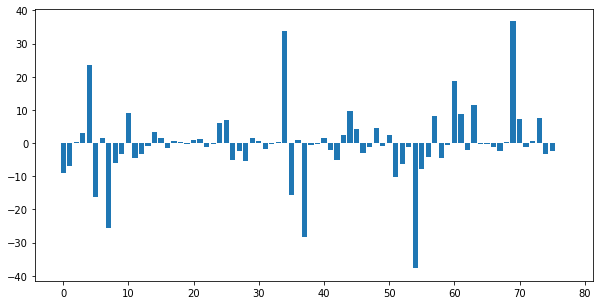

koeficijenti:  [ -9.04651214  -6.82023802   0.21862164   3.1989805   23.45453519
 -16.27586712   1.65556219 -25.72923571  -5.97302724  -3.3897595
   9.06329587  -4.43881913  -3.24546516  -0.73659418   3.30234733
   1.55795279  -1.46768793   0.58934914   0.2987748   -0.36235569
   0.80062165   1.19211471  -1.18463274  -0.29474194   6.05605585
   6.831861    -5.01570133  -2.48829968  -5.48281332   1.41085547
   0.67260513  -1.71950541  -0.19248506   0.46257832  33.88505412
 -15.59133756   1.02408502 -28.30620811  -0.51135377  -0.25728434
   1.40707092  -2.09521991  -5.19914433   2.39349481   9.61668948
   4.18219018  -2.89382819  -1.16509752   4.44801521  -1.01246013
   2.49365188 -10.07103839  -6.21512735  -1.04584815 -37.77986747
  -7.89614136  -4.25257794   8.08663105  -4.41493836  -0.54741939
  18.80448796   8.91965571  -2.14517407  11.60973928  -0.17748337
  -0.39998782  -1.0972676   -2.41955624   0.26955238  36.70344245
   7.30546039  -1.04843354   0.72847729   7.49329756  -3.35278

In [292]:
# Linearna regresija sa hipotezom y=b0+b1x1+b2x2+...+bnxn+c1x1x2+c2x1x3+...
#samo interakcije
poly=PolynomialFeatures(interaction_only=True, include_bias=False)
x_inter_train=poly.fit_transform(x_train_std)
x_inter_val=poly.fit_transform(x_val_std)

print(poly.get_feature_names())

model_interaction=LinearRegression()
model_interaction.fit(x_inter_train, y_train)
y_predicted_inter=model_interaction.predict(x_inter_val)

model_evaluation(y_val, y_predicted_inter, x_inter_train.shape[0], x_inter_train.shape[1])

# Ilustracija koeficijenata
plt.figure(figsize=(10,5))
plt.bar(range(len(model_interaction.coef_)), model_interaction.coef_)
plt.show()
print("koeficijenti: ", model_interaction.coef_)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x0^2', 'x0 x1', 'x0 x2', 'x0 x3', 'x0 x4', 'x0 x5', 'x0 x6', 'x0 x7', 'x0 x8', 'x0 x9', 'x0 x10', 'x0 x11', 'x1^2', 'x1 x2', 'x1 x3', 'x1 x4', 'x1 x5', 'x1 x6', 'x1 x7', 'x1 x8', 'x1 x9', 'x1 x10', 'x1 x11', 'x2^2', 'x2 x3', 'x2 x4', 'x2 x5', 'x2 x6', 'x2 x7', 'x2 x8', 'x2 x9', 'x2 x10', 'x2 x11', 'x3^2', 'x3 x4', 'x3 x5', 'x3 x6', 'x3 x7', 'x3 x8', 'x3 x9', 'x3 x10', 'x3 x11', 'x4^2', 'x4 x5', 'x4 x6', 'x4 x7', 'x4 x8', 'x4 x9', 'x4 x10', 'x4 x11', 'x5^2', 'x5 x6', 'x5 x7', 'x5 x8', 'x5 x9', 'x5 x10', 'x5 x11', 'x6^2', 'x6 x7', 'x6 x8', 'x6 x9', 'x6 x10', 'x6 x11', 'x7^2', 'x7 x8', 'x7 x9', 'x7 x10', 'x7 x11', 'x8^2', 'x8 x9', 'x8 x10', 'x8 x11', 'x9^2', 'x9 x10', 'x9 x11', 'x10^2', 'x10 x11', 'x11^2']
Mean squared error:  1027.7076715970832
Mean absolute error:  22.87537650674861
Root mean squared error:  32.05788002343703
R2 score:  0.24246149462051425
R2 adjusted score:  0.23943819341506212
       y      y_

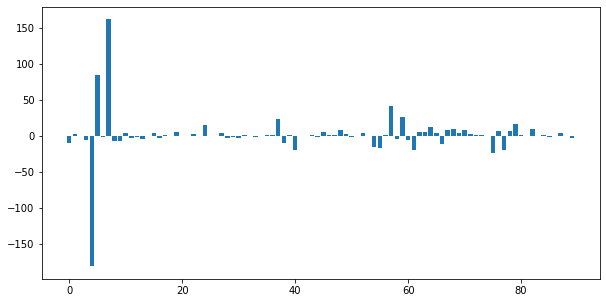

koeficijenti:  [-9.84996458e+00  2.92400664e+00 -1.69231106e-01 -6.64715797e+00
 -1.81594154e+02  8.46931360e+01 -1.16586366e+00  1.61589562e+02
 -8.05228192e+00 -7.12054473e+00  4.31766424e+00 -2.79114966e+00
 -2.09577239e+00 -3.97257882e+00 -5.68281984e-01  3.46372088e+00
 -3.49421242e+00  1.08979934e+00 -6.04087818e-02  4.45371301e+00
 -4.53935755e-01 -1.01291007e-01  1.84482100e+00 -8.18700198e-01
  1.45674585e+01 -1.42535606e-01 -5.83791263e-01  3.83197489e+00
 -3.62294504e+00 -2.22577392e+00 -3.74852618e+00  4.78789789e-01
  1.76252221e-01 -1.27675390e+00 -6.04857857e-01  1.24361971e+00
  2.92096383e-01  2.32013020e+01 -9.71339436e+00  8.83895090e-01
 -1.93416381e+01 -5.06063305e-01 -5.15709916e-01  1.14500296e+00
 -1.69608054e+00  4.47622308e+00  3.53728051e-01  8.70100328e-01
  7.84705590e+00  1.75825313e+00 -1.44729755e+00 -9.49204970e-01
  4.00831779e+00 -7.13033218e-01 -1.56802494e+01 -1.76865672e+01
  5.33391661e-01  4.08440660e+01 -4.97294360e+00  2.56482713e+01
 -6.097191

In [293]:
# Linearna regresija sa hipotezom y=b0+b1x1+b2x2+...+bnxn+c1x1x2+c2x1x3+...
#interakcije i kvadrati
poly=PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
x_inter_sq_train=poly.fit_transform(x_train_std)
x_inter_sq_val=poly.fit_transform(x_val_std)
x_inter_sq_test=poly.fit_transform(x_test_std)

print(poly.get_feature_names())

model_interaction_sq=LinearRegression()
model_interaction_sq.fit(x_inter_sq_train, y_train)
y_predicted_inter_sq=model_interaction_sq.predict(x_inter_sq_val)

model_evaluation(y_val, y_predicted_inter_sq, x_inter_sq_train.shape[0], x_inter_sq_train.shape[1])

# Ilustracija koeficijenata
plt.figure(figsize=(10,5))
plt.bar(range(len(model_interaction_sq.coef_)), model_interaction_sq.coef_)
plt.show()
print("koeficijenti: ", model_interaction_sq.coef_)

Mean squared error:  1028.8868880177463
Mean absolute error:  22.89171907482497
Root mean squared error:  32.0762667406565
R2 score:  0.24159227677820716
R2 adjusted score:  0.23856550656447117
       y      y_pred
0   48.0   35.295310
1   63.0   33.010261
2   71.0   42.646910
3   79.0   73.141965
4   78.0   66.953614
5   81.0  100.393545
6   98.0   65.097681
7   96.0   49.771166
8   88.0   48.208252
9   66.0   90.095735
10  58.0   49.556120
11  64.0   57.284182
12  55.0   38.171991
13  50.0   64.363994
14  64.0   18.138008
15  89.0   27.924159
16  84.0   66.512240
17  77.0   46.193781
18  75.0   31.975925
19  79.0   73.739467


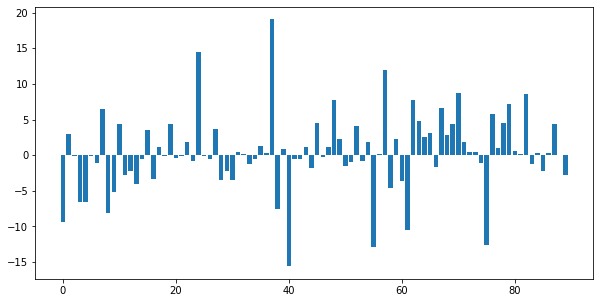

koeficijenti:  [ -9.34972838   2.98372567  -0.08039354  -6.56117676  -6.59291091
  -0.0540811   -1.04949796   6.48122778  -8.04282052  -5.20212775
   4.34009492  -2.75937272  -2.19248085  -4.09122959  -0.55341103
   3.51410299  -3.29952503   1.11455939  -0.08455603   4.35383399
  -0.44893622  -0.1543032    1.83430364  -0.79591457  14.50053208
  -0.14350281  -0.53433917   3.6851723   -3.50794371  -2.15316078
  -3.55313652   0.48770219   0.18100022  -1.26442212  -0.47299279
   1.27098545   0.33459005  19.04747996  -7.59572166   0.91119538
 -15.60750759  -0.50902941  -0.53595151   1.13038252  -1.75039668
   4.45582215  -0.21353888   1.15864604   7.77024859   2.22562112
  -1.45146889  -0.9699964    4.03049353  -0.84401652   1.85625365
 -12.93759083   0.12557335  11.92146874  -4.54504064   2.235953
  -3.64713136 -10.50208352   7.71974065   4.73909615   2.58926011
   3.05717633  -1.68155948   6.65300205   2.82778231   4.35418896
   8.68720601   1.87433573   0.44724364   0.38993584  -1.129618

In [294]:
# RIDGE

# Inicijalizacija
model_ridge = Ridge(alpha=5)

# Obuka modela
model_ridge.fit(x_inter_sq_train, y_train)

# Testiranje
y_predictedR = model_ridge.predict(x_inter_sq_val)

# Evaluacija
model_evaluation(y_val, y_predictedR, x_inter_sq_train.shape[0], x_inter_sq_train.shape[1])


# Ilustracija koeficijenata
plt.figure(figsize=(10,5))
plt.bar(range(len(model_ridge.coef_)),model_ridge.coef_)
plt.show()
print("koeficijenti: ", model_ridge.coef_)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.674e+05, tolerance: 3.109e+03
  model = cd_fast.enet_coordinate_descent(


Mean squared error:  1029.6937411729978
Mean absolute error:  22.89855436334775
Root mean squared error:  32.08884138096914
R2 score:  0.24099753339914876
R2 adjusted score:  0.23796838959204147
       y     y_pred
0   48.0  35.910078
1   63.0  32.991229
2   71.0  42.798639
3   79.0  73.071468
4   78.0  67.108388
5   81.0  99.408675
6   98.0  64.781634
7   96.0  49.995293
8   88.0  47.504921
9   66.0  89.397968
10  58.0  49.291881
11  64.0  57.629126
12  55.0  38.574489
13  50.0  64.115327
14  64.0  17.512980
15  89.0  27.798885
16  84.0  67.811840
17  77.0  46.477721
18  75.0  32.575889
19  79.0  73.026028


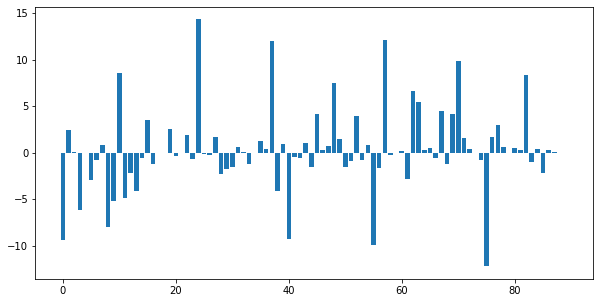

koeficijenti:  [ -9.35114006   2.45347526   0.06708651  -6.17340308   0.
  -2.93493879  -0.79427109   0.83951834  -8.05464744  -5.20290452
   8.59397493  -4.93326142  -2.18689162  -4.08608636  -0.54842701
   3.46605395  -1.25901057   0.          -0.03896133   2.54650436
  -0.36903152  -0.08518428   1.85800289  -0.65473949  14.34089667
  -0.11167936  -0.23986306   1.67097685  -2.26128969  -1.80419843
  -1.54186863   0.57351699   0.11007459  -1.18826001  -0.
   1.21462281   0.35829866  12.01156088  -4.07601964   0.91339596
  -9.3157976   -0.49062586  -0.55977693   1.07523964  -1.50814872
   4.15967387   0.25147563   0.73206763   7.52690585   1.49340697
  -1.511995    -0.91359713   3.90923774  -0.81570565   0.78142135
  -9.97533134  -1.65670336  12.14980243  -0.27766705   0.
   0.2235645   -2.80918756   6.66597849   5.40372866   0.33028599
   0.49011811  -0.53420738   4.43133156  -1.24920022   4.19967575
   9.81069129   1.626128     0.36047038   0.          -0.80861292
 -12.24766054   1.6

In [295]:
# LASSO

# Model initialization
model_lasso = Lasso(alpha=0.01)

# Fit the data(train the model)
model_lasso.fit(x_inter_sq_train, y_train)

# Predict
y_predictedL = model_lasso.predict(x_inter_sq_val)

# Evaluation
model_evaluation(y_val, y_predictedL, x_inter_sq_train.shape[0], x_inter_sq_train.shape[1])


#ilustracija koeficijenata
plt.figure(figsize=(10,5))
plt.bar(range(len(model_lasso.coef_)),model_lasso.coef_)
plt.show()
print("koeficijenti: ", model_lasso.coef_)

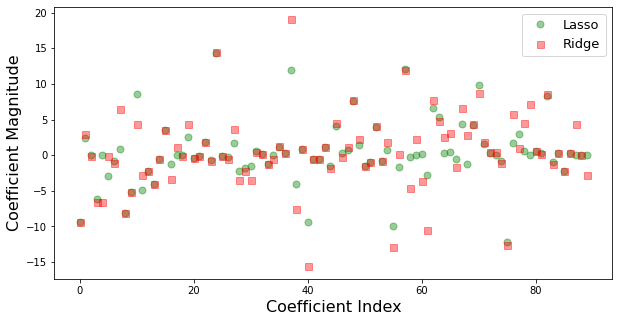

In [296]:
plt.figure(figsize=(10,5))
#plt.plot(model_interaction_sq.coef_,alpha=0.7,linestyle='none',marker='s',markersize=5,color='blue',label=r'linear(inter+square)',zorder=7) 
#plt.plot(model_interaction.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'linear(inter)',zorder=7) 
plt.plot(model_lasso.coef_,alpha=0.4,linestyle='none',marker='o',markersize=7,color='green',label='Lasso')
plt.plot(model_ridge.coef_,alpha=0.4,linestyle='none',marker='s',markersize=7,color='red',label='Ridge')
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc='best')
plt.show()

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.674e+05, tolerance: 3.109e+03
  model = cd_fast.enet_coordinate_descent(


Mean squared error:  1007.8742692429165
Mean absolute error:  22.48464167576742
Root mean squared error:  31.747035597720245
R2 score:  0.24088018277976642
R2 adjusted score:  0.2378505706317543
       y     y_pred
0   48.0  52.781867
1   63.0  73.142680
2   71.0  55.514208
3   79.0  45.055312
4   78.0  38.678508
5   81.0  31.526821
6   98.0  87.008997
7   96.0  67.042619
8   88.0  84.697153
9   66.0  56.262483
10  58.0  39.672201
11  64.0  80.468187
12  55.0  35.395696
13  50.0  62.118935
14  64.0  12.911456
15  89.0  51.547658
16  84.0  59.692093
17  77.0  17.853976
18  75.0  43.626011
19  79.0  66.749757


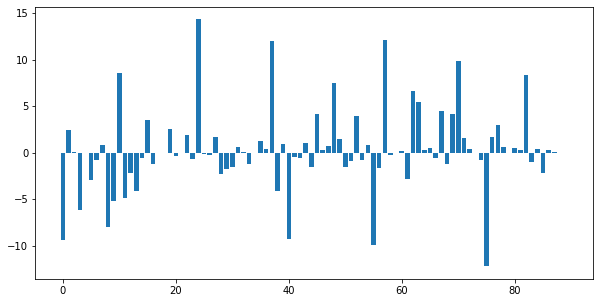

koeficijenti:  [ -9.35114006   2.45347526   0.06708651  -6.17340308   0.
  -2.93493879  -0.79427109   0.83951834  -8.05464744  -5.20290452
   8.59397493  -4.93326142  -2.18689162  -4.08608636  -0.54842701
   3.46605395  -1.25901057   0.          -0.03896133   2.54650436
  -0.36903152  -0.08518428   1.85800289  -0.65473949  14.34089667
  -0.11167936  -0.23986306   1.67097685  -2.26128969  -1.80419843
  -1.54186863   0.57351699   0.11007459  -1.18826001  -0.
   1.21462281   0.35829866  12.01156088  -4.07601964   0.91339596
  -9.3157976   -0.49062586  -0.55977693   1.07523964  -1.50814872
   4.15967387   0.25147563   0.73206763   7.52690585   1.49340697
  -1.511995    -0.91359713   3.90923774  -0.81570565   0.78142135
  -9.97533134  -1.65670336  12.14980243  -0.27766705   0.
   0.2235645   -2.80918756   6.66597849   5.40372866   0.33028599
   0.49011811  -0.53420738   4.43133156  -1.24920022   4.19967575
   9.81069129   1.626128     0.36047038   0.          -0.80861292
 -12.24766054   1.6

In [297]:
# LASSO - predikcija na test skupu

# Model initialization
model_lasso = Lasso(alpha=0.01)

# Fit the data(train the model)
model_lasso.fit(x_inter_sq_train, y_train)

# Predict
y_predictedL_test = model_lasso.predict(x_inter_sq_test)

# Evaluation
model_evaluation(y_test, y_predictedL_test, x_inter_sq_train.shape[0], x_inter_sq_train.shape[1])


#ilustracija koeficijenata
plt.figure(figsize=(10,5))
plt.bar(range(len(model_lasso.coef_)),model_lasso.coef_)
plt.show()
print("koeficijenti: ", model_lasso.coef_)

In [418]:
#kNN
df.loc[df['PM_US Post']<=55.4, "Bezbednost"] = "bezbedno"
df.loc[(df['PM_US Post']>=55.5)&(df['PM_US Post']<=150.4), "Bezbednost"] = "nebezbedno"
df.loc[df['PM_US Post']>=150.5, "Bezbednost"] = "opasno"

In [419]:
X = df.iloc[:, :-1].copy() # obelezja
Y = df.iloc[:, -1].copy() # labele

In [420]:
df.drop(['PM_US Post'], axis=1, inplace=True)

In [421]:
df

year  month  day  hour  season  DEWP  HUMI         PRES  TEMP   Iws  \
16549  2011     11   21    13     3.0  13.9  64.0  1013.900000  21.0  10.9   
16550  2011     11   21    14     3.0  13.8  67.0  1012.700000  20.1   3.7   
16551  2011     11   21    15     3.0  14.3  68.0  1012.300000  20.4   6.5   
16552  2011     11   21    16     3.0  14.5  68.0  1012.000000  20.6   9.3   
16553  2011     11   21    17     3.0  14.2  69.0  1012.200000  20.1   2.2   
...     ...    ...  ...   ...     ...   ...   ...          ...   ...   ...   
52578  2015     12   31    18     4.0  10.1  68.0  1017.700012  16.0   9.5   
52579  2015     12   31    19     4.0  11.0  80.0  1018.299988  14.4  10.9   
52580  2015     12   31    20     4.0  11.4  82.0  1018.700012  14.5  12.9   
52581  2015     12   31    21     4.0  11.1  78.0  1019.300000  14.9  14.7   
52582  2015     12   31    22     4.0  10.4  75.0  1019.500000  14.8  15.9   

       precipitation  Iprec  cbwd_NE  cbwd_NW  cbwd_SE  cbwd_SW  Bezbednost  
16549            0.0    0.0        1        0        0        0    bezbedno  
16550            0.0    0.0        0        1        0        0  nebezbedno  
16551            0.0    0.0        0        1        0        0  nebezbedno  
16552            0.0    0.0        0        1        0        0  nebezbedno  
16553            0.0    0.0        1        0        0        0  nebezbedno  
...              ...    ...      ...      ...      ...      ...         ...  
52578            0.0    0.0        0        1        0        0    bezbedno  
52579            0.0    0.0        0        1        0        0  nebezbedno  
52580            0.0    0.0        0        1        0        0  nebezbedno  
52581            0.0    0.0        0        1        0        0  nebezbedno  
52582            0.0    0.0        0        1        0        0  nebezbedno  

[32347 rows x 17 columns]

In [422]:
X = df.iloc[:, :-1].copy() # obelezja
Y = df.iloc[:, -1].copy() # labele

In [423]:
Y.unique()

array(['bezbedno', 'nebezbedno', 'opasno'], dtype=object)

In [424]:
X

year  month  day  hour  season  DEWP  HUMI         PRES  TEMP   Iws  \
16549  2011     11   21    13     3.0  13.9  64.0  1013.900000  21.0  10.9   
16550  2011     11   21    14     3.0  13.8  67.0  1012.700000  20.1   3.7   
16551  2011     11   21    15     3.0  14.3  68.0  1012.300000  20.4   6.5   
16552  2011     11   21    16     3.0  14.5  68.0  1012.000000  20.6   9.3   
16553  2011     11   21    17     3.0  14.2  69.0  1012.200000  20.1   2.2   
...     ...    ...  ...   ...     ...   ...   ...          ...   ...   ...   
52578  2015     12   31    18     4.0  10.1  68.0  1017.700012  16.0   9.5   
52579  2015     12   31    19     4.0  11.0  80.0  1018.299988  14.4  10.9   
52580  2015     12   31    20     4.0  11.4  82.0  1018.700012  14.5  12.9   
52581  2015     12   31    21     4.0  11.1  78.0  1019.300000  14.9  14.7   
52582  2015     12   31    22     4.0  10.4  75.0  1019.500000  14.8  15.9   

       precipitation  Iprec  cbwd_NE  cbwd_NW  cbwd_SE  cbwd_SW  
16549            0.0    0.0        1        0        0        0  
16550            0.0    0.0        0        1        0        0  
16551            0.0    0.0        0        1        0        0  
16552            0.0    0.0        0        1        0        0  
16553            0.0    0.0        1        0        0        0  
...              ...    ...      ...      ...      ...      ...  
52578            0.0    0.0        0        1        0        0  
52579            0.0    0.0        0        1        0        0  
52580            0.0    0.0        0        1        0        0  
52581            0.0    0.0        0        1        0        0  
52582            0.0    0.0        0        1        0        0  

[32347 rows x 16 columns]

In [425]:
print('Uzoraka iz klase bezbedno:', sum(Y=='bezbedno'), '\nUzoraka iz klase nebezbedno:', sum(Y=='nebezbedno'), '\nUzoraka iz klase opasno:', sum(Y=='opasno'))

Uzoraka iz klase bezbedno: 20861 
Uzoraka iz klase nebezbedno: 10766 
Uzoraka iz klase opasno: 720


In [426]:
def evaluation_classifier(conf_mat):
    
    TPb = conf_mat[0][0]
    FPb = conf_mat[1][0] + conf_mat[2][0]
    TNb = conf_mat[1][1] + conf_mat[1][2] + conf_mat[2][1] + conf_mat[2][2]
    FNb = conf_mat[0][1] + conf_mat[0][2]
    TPn = conf_mat[1][1]
    FPn = conf_mat[0][1] + conf_mat[2][1]
    TNn = conf_mat[0][0] + conf_mat[0][2] + conf_mat[2][0] + conf_mat[2][2]
    FNn = conf_mat[1][0] + conf_mat[1][2]
    TPo = conf_mat[2][2]
    FPo = conf_mat[0][2] + conf_mat[1][2]
    TNo = conf_mat[0][0] + conf_mat[0][1] + conf_mat[1][0] + conf_mat[1][1]
    FNo = conf_mat[2][0] + conf_mat[2][1]

    precisionB = TPb / (TPb + FPb)
    precisionN = TPn / (TPn + FPn)
    precisionO = TPo / (TPo + FPo)
    precision = (TPb + TPn + TPo) / ((TPb + FPb) + (TPn + FPn) + (TPo + FPo))

    accuracyB = (TPb + TNb) / (TPb + TNb + FPb + FNb)
    accuracyN = (TPn + TNn) / (TPn + TNn + FPn + FNn)
    accuracyO = (TPo + TNo) / (TPo + TNo + FPo + FNo)
    accuracy =  (accuracyB + accuracyN + accuracyO ) / 3

    sensitivityB = TPb / (TPb + FNb)
    sensitivityN = TPn / (TPn + FNn)
    sensitivityO = TPo / (TPo + FNo)
    sensitivity = (TPb + TPn + TPo) / ((TPb + FNb) + (TPn + FNn) + (TPo + FNo))

    specificityB = TNb / (TNb + FPb)
    specificityN = TNn / (TNn + FPn)
    specificityO = TNo / (TNo + FPo)
    specificity = (TNb + TNn + TNo) / ((TNb + FPb) + (TNn + FPn) + (TNo + FPo))

    F_scoreB = 2 * ((precisionB * sensitivityB)/(precisionB + sensitivityB))
    F_scoreN = 2 * ((precisionN * sensitivityN)/(precisionN + sensitivityN))
    F_scoreO = 2 * ((precisionO * sensitivityO)/(precisionO + sensitivityO))
    F_score = 2 * ((precision * sensitivity)/ (precision + sensitivity))

    print('BEZBEDNO:\n')
    print('precision: ', precisionB)
    print('accuracy: ', accuracyB)
    print('sensitivity/recall: ', sensitivityB)
    print('specificity: ', specificityB)
    print('F score: ', F_scoreB)

    print('\n\nNEBEZBEDNO:\n')
    print('precision: ', precisionN)
    print('accuracy: ', accuracyN)
    print('sensitivity/recall: ', sensitivityN)
    print('specificity: ', specificityN)
    print('F score: ', F_scoreN)

    print('\n\nOPASNO: \n')
    print('precision: ', precisionO)
    print('accuracy: ', accuracyO)
    print('sensitivity/recall: ', sensitivityO)
    print('specificity: ', specificityO)
    print('F score: ', F_scoreO)

    print('\n\nMERE USPESNOSTI ZA KLASIFIKATOR: \n')
    print('Classifier precision: ', precision)
    print('Classifier accuracy: ', accuracy)
    print('Classifier sensitivity/recall: ', sensitivity)
    print('Classifier specificity: ', specificity)
    print('Classifier F score: ', F_score)

In [476]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, random_state=10, stratify=Y)

In [474]:
Y_train.shape

(27494,)

In [433]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [469]:
X_train

year  month  day  hour  season       DEWP  HUMI         PRES  TEMP  \
38905  2014      6   10     1     2.0  23.800000  84.0   993.500000  26.8   
17063  2011     12   12    23     4.0   1.700000  49.0  1013.400000  12.1   
38990  2014      6   13    14     2.0  15.000000  33.0   994.300000  33.5   
20160  2012      4   20     0     1.0  20.900000  95.0  1002.400000  21.7   
27522  2013      2   20    18     4.0   8.800000  65.0  1011.900000  15.3   
...     ...    ...  ...   ...     ...        ...   ...          ...   ...   
51159  2015     11    2    15     3.0   9.500000  41.0  1010.500000  23.5   
47315  2015      5   26    11     1.0  24.200001  82.0   999.500000  27.6   
33349  2013     10   21    13     3.0  16.900000  54.0  1006.900000  27.0   
27017  2013      1   30    17     4.0  12.900000  55.0  1012.500000  22.4   
52232  2015     12   17     8     4.0  -3.300000  44.0  1020.599976   8.2   

        Iws  precipitation  Iprec  cbwd_NE  cbwd_NW  cbwd_SE  cbwd_SW  
38905   5.5            0.0    0.0        0        0        1        0  
17063   7.3            0.0    0.0        1        0        0        0  
38990  20.4            0.0    0.0        1        0        0        0  
20160   1.6            0.0    0.0        0        1        0        0  
27522   2.8            0.0    0.0        0        1        0        0  
...     ...            ...    ...      ...      ...      ...      ...  
51159   7.4            0.0    0.0        1        0        0        0  
47315   7.2            0.1    0.1        0        0        1        0  
33349   3.9            0.0    0.0        0        1        0        0  
27017   2.9            0.0    0.0        0        0        0        1  
52232  43.8            0.0    0.0        1        0        0        0  

[27494 rows x 16 columns]

In [477]:
numeric_feats = [item for item in x.columns if 'cbwd' not in item]
dummy_feats = [item for item in x.columns if 'cbwd' in item]

scaler=StandardScaler()
scaler.fit(X_train[numeric_feats])
X_train_std=pd.DataFrame(scaler.transform(X_train[numeric_feats]), columns = numeric_feats)
X_test_std=pd.DataFrame(scaler.transform(X_test[numeric_feats]), columns = numeric_feats)
X_train_std=pd.concat([X_train_std, X_train[dummy_feats].reset_index(drop=True)], axis=1)
X_test_std=pd.concat([X_test_std, X_test[dummy_feats].reset_index(drop=True)], axis=1)

In [450]:
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)


In [363]:
parameters = {'metric':['euclidean', 'manhattan', 'chebyshev'], 'n_neighbors':list(range(2, 21))}

knn = KNeighborsClassifier()
clf = GridSearchCV(estimator=knn, param_grid=parameters, scoring='accuracy', cv=kfold, refit=True, verbose=3)

scaler=StandardScaler()
scaler.fit(X_train[numeric_feats])
X_train_std=pd.DataFrame(scaler.transform(X_train[numeric_feats]), columns = numeric_feats)
X_test_std=pd.DataFrame(scaler.transform(X_test[numeric_feats]), columns = numeric_feats)
X_train_std=pd.concat([X_train_std, X_train[dummy_feats].reset_index(drop=True)], axis=1)
X_test_std=pd.concat([X_test_std, X_test[dummy_feats].reset_index(drop=True)], axis=1)

clf.fit(X_train_std, Y_train)

print(clf.best_score_)
print(clf.best_params_)

#dodati prosecnu tacnost i tacnost za svaku klasu + matrica konfucija

Fitting 10 folds for each of 57 candidates, totalling 570 fits
[CV 1/10] END ..metric=euclidean, n_neighbors=2;, score=0.800 total time=   0.4s
[CV 2/10] END ..metric=euclidean, n_neighbors=2;, score=0.811 total time=   0.4s
[CV 3/10] END ..metric=euclidean, n_neighbors=2;, score=0.804 total time=   0.4s
[CV 4/10] END ..metric=euclidean, n_neighbors=2;, score=0.800 total time=   0.4s
[CV 5/10] END ..metric=euclidean, n_neighbors=2;, score=0.796 total time=   0.4s
[CV 6/10] END ..metric=euclidean, n_neighbors=2;, score=0.810 total time=   0.4s
[CV 7/10] END ..metric=euclidean, n_neighbors=2;, score=0.806 total time=   0.4s
[CV 8/10] END ..metric=euclidean, n_neighbors=2;, score=0.817 total time=   0.4s
[CV 9/10] END ..metric=euclidean, n_neighbors=2;, score=0.826 total time=   0.4s
[CV 10/10] END .metric=euclidean, n_neighbors=2;, score=0.810 total time=   0.4s
[CV 1/10] END ..metric=euclidean, n_neighbors=3;, score=0.809 total time=   0.4s
[CV 2/10] END ..metric=euclidean, n_neighbors=

In [436]:
y_pred = clf.predict(X_test_std)

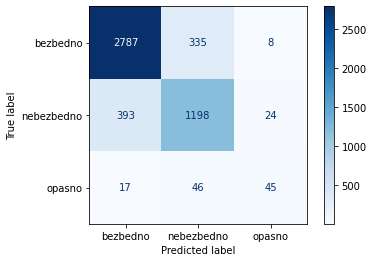

BEZBEDNO:

precision:  0.8717547700969659
accuracy:  0.8448382443849165
sensitivity/recall:  0.8904153354632588
specificity:  0.7620429483459082
F score:  0.880986249407302


NEBEZBEDNO:

precision:  0.7587080430652312
accuracy:  0.8355656295075211
sensitivity/recall:  0.7417956656346749
specificity:  0.8823347745521927
F score:  0.7501565435190983


OPASNO: 

precision:  0.5844155844155844
accuracy:  0.9804244797032763
sensitivity/recall:  0.4166666666666667
specificity:  0.9932560590094837
F score:  0.4864864864864865


MERE USPESNOSTI ZA KLASIFIKATOR: 

Classifier precision:  0.830414176797857
Classifier accuracy:  0.8869427845319047
Classifier sensitivity/recall:  0.830414176797857
Classifier specificity:  0.9152070883989285
Classifier F score:  0.830414176797857


In [437]:
conf_mat = confusion_matrix(Y_test, y_pred, labels=clf.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat,  display_labels=clf.classes_)
disp.plot(cmap="Blues")

plt.show()


evaluation_classifier(conf_mat)

In [472]:
Y_train.shape

(24744,)

Matrica konfuzije u iteraciji  1


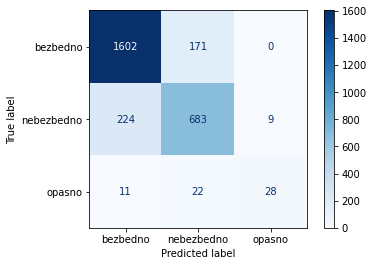

Tacnost = 0.8410909090909091

Matrica konfuzije u iteraciji  2


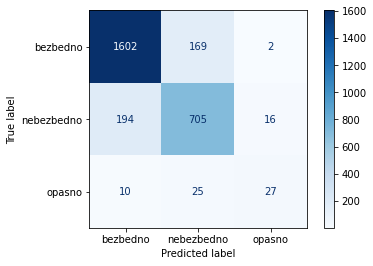

Tacnost = 0.8487272727272728

Matrica konfuzije u iteraciji  3


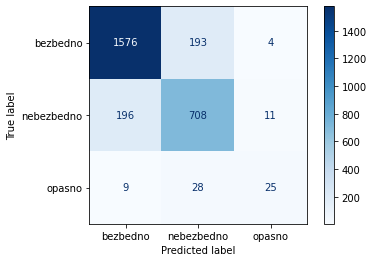

Tacnost = 0.8396363636363636

Matrica konfuzije u iteraciji  4


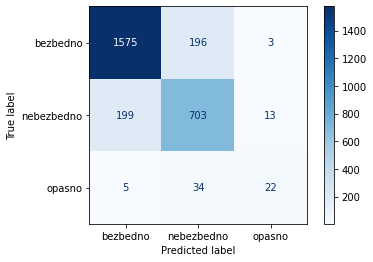

Tacnost = 0.8363636363636363

Matrica konfuzije u iteraciji  5


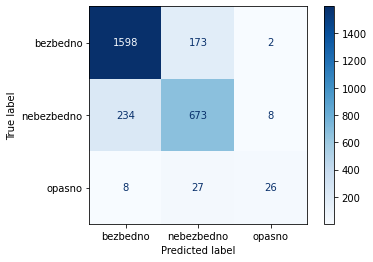

Tacnost = 0.8355765732993816

Matrica konfuzije u iteraciji  6


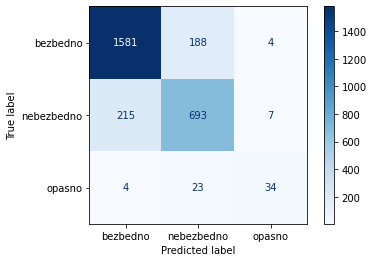

Tacnost = 0.8395780283739541

Matrica konfuzije u iteraciji  7


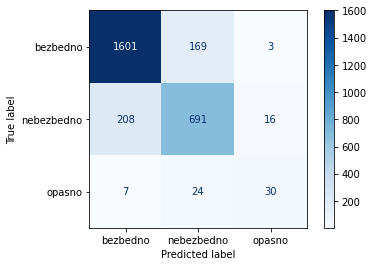

Tacnost = 0.8446707893779556

Matrica konfuzije u iteraciji  8


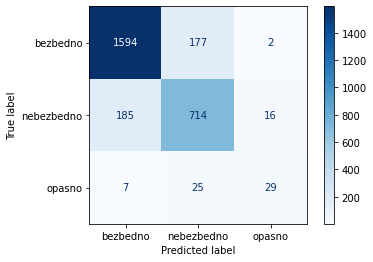

Tacnost = 0.8501273190251001

Matrica konfuzije u iteraciji  9


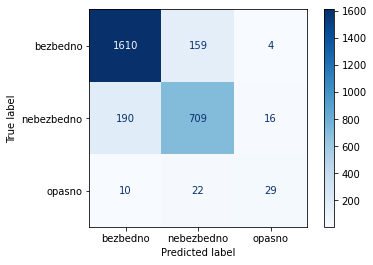

Tacnost = 0.8541287740996726

Matrica konfuzije u iteraciji  10


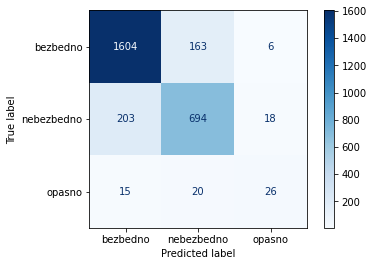

Tacnost = 0.8453983266642415

PROSECNA TACNOST KLASIFIKATORA JE [0.8453983266642415]

FINALNA MATRICA KONFUZIJE: 


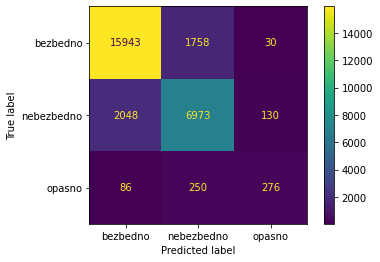

BEZBEDNO:

precision:  0.8819494385130277
accuracy:  0.8573506946970249
sensitivity/recall:  0.8991596638655462
specificity:  0.7814196456007375
F score:  0.8904714030384272


NEBEZBEDNO:

precision:  0.7764168800801693
accuracy:  0.8477485996944788
sensitivity/recall:  0.7619932247841766
specificity:  0.8905304475821839
F score:  0.7691374365762189


OPASNO: 

precision:  0.6330275229357798
accuracy:  0.9819597002982469
sensitivity/recall:  0.45098039215686275
specificity:  0.9940480619001563
F score:  0.5267175572519084


MERE USPESNOSTI ZA KLASIFIKATOR: 

Classifier precision:  0.8435294973448753
Classifier accuracy:  0.8956863315632502
Classifier sensitivity/recall:  0.8435294973448753
Classifier specificity:  0.9217647486724376
Classifier F score:  0.8435294973448753


In [478]:
from sklearn.metrics import accuracy_score

indexes = kfold.split(X_train_std, Y_train)
fin_conf_matrix = np.zeros((len(np.unique(Y)), len(np.unique(Y))))
i=0
accuracy=[]

for train_index, test_index in indexes:
 
  Xfold_train = X_train_std.iloc[train_index,:]
  yfold_train = Y_train.iloc[train_index]
  Xfold_test = X_train_std.iloc[test_index,:]
  yfold_test = Y_train.iloc[test_index]

  tmp_accuracy=[]

  classifier = KNeighborsClassifier(n_neighbors=3, metric='manhattan')
  classifier.fit(Xfold_train, yfold_train)
  y_pred = classifier.predict(Xfold_test)

  i=i+1
  print('Matrica konfuzije u iteraciji ', i)
  conf_matrix = confusion_matrix(yfold_test, y_pred, labels=classifier.classes_)
  disp = ConfusionMatrixDisplay.from_predictions(y_true=yfold_test, y_pred=y_pred, labels=classifier.classes_, cmap=plt.cm.Blues)
  plt.show()

  print('Tacnost = {}\n'.format(accuracy_score(yfold_test, y_pred)))
  fin_conf_matrix += conf_matrix

  tmp_accuracy.append(accuracy_score(yfold_test, y_pred))

accuracy.append(np.mean(tmp_accuracy))
print('PROSECNA TACNOST KLASIFIKATORA JE {}'.format(accuracy))

print('\nFINALNA MATRICA KONFUZIJE: ')
disp = ConfusionMatrixDisplay(confusion_matrix=fin_conf_matrix, display_labels=classifier.classes_)
disp.plot(values_format='.0f')
plt.show()

evaluation_classifier(fin_conf_matrix)

Tacnost =  0.8521 

BEZBEDNO:

precision:  0.891832229580574
accuracy:  0.8670925200906656
sensitivity/recall:  0.9035143769968051
specificity:  0.8009286128845038
F score:  0.8976352959847643


NEBEZBEDNO:

precision:  0.7836658354114713
accuracy:  0.8547290335874717
sensitivity/recall:  0.778328173374613
specificity:  0.8928350833848054
F score:  0.7809878844361603


OPASNO: 

precision:  0.6410256410256411
accuracy:  0.9822790026787555
sensitivity/recall:  0.46296296296296297
specificity:  0.9940990516332983
F score:  0.5376344086021506


MERE USPESNOSTI ZA KLASIFIKATOR: 

Classifier precision:  0.8520502781784464
Classifier accuracy:  0.9013668521189643
Classifier sensitivity/recall:  0.8520502781784464
Classifier specificity:  0.9260251390892231
Classifier F score:  0.8520502781784464


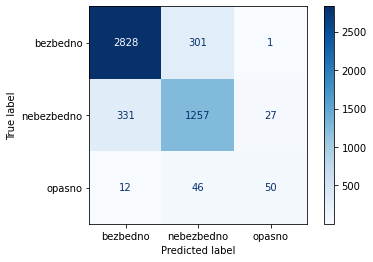

In [480]:
#Treniranje na celom test skupu i testiranje na test
knn = KNeighborsClassifier(n_neighbors=3, metric='manhattan')

#scaler=StandardScaler()
#scaler.fit(X_train[numeric_feats])
#X_train_std=pd.DataFrame(scaler.transform(X_train[numeric_feats]), columns = numeric_feats)
#X_test_std=pd.DataFrame(scaler.transform(X_test[numeric_feats]), columns = numeric_feats)
#X_train_std=pd.concat([X_train_std, X_train[dummy_feats].reset_index(drop=True)], axis=1)
#X_test_std=pd.concat([X_test_std, X_test[dummy_feats].reset_index(drop=True)], axis=1)

knn.fit(X_train_std, Y_train)
y_pred_test = knn.predict(X_test_std)

test_accuracy = accuracy_score(Y_test, y_pred_test)
conf_matrix = confusion_matrix(Y_test, y_pred_test, labels=clf.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,  display_labels=clf.classes_)
disp.plot(cmap="Blues")
print('Tacnost = ', np.round(test_accuracy, 4), '\n')
evaluation_classifier(conf_matrix)